# Advanced Regression Model:
## Surprise homes

1. Load Required Libraries

In [113]:
## Import requisite libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

2. Read data, understand data, data Exploration

In [114]:
## Load the csv file
df = pd.read_csv('train.csv')

## View the first five rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [115]:
## check the dimension
df.shape

(1460, 81)

In [116]:
## Preventing 'NA' to be read as 'NaN' by pandas
df = pd.read_csv('train.csv', keep_default_na=False)
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [117]:
## Replacing all 'NA' of categorical columns by 'None'
df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']] = df[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].replace("NA", "None")
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave  None      Reg   
1   2          20       RL          80     9600   Pave  None      Reg   
2   3          60       RL          68    11250   Pave  None      IR1   
3   4          70       RL          60     9550   Pave  None      IR1   
4   5          60       RL          84    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [118]:
## check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

<p> Converting the column to match as per the data dictionary </p>

In [8]:
## Convert three columns to 'object' type as mentioned above
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [9]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [11]:
## Verify whether the data types of five columns have changed
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [12]:
## view the statistical decription of the numerical columns
df.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea   WoodDeckSF  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808     0.613014     1.767123   472.980137    94.244521   
std        1.625393     0.644666     0.747315   213.804841   125.338794   
min        2.000000     0.000000     0.000000     0.000000     0.000000   
25%        5.000000     0.000000     1.000000   334.500000     0.000000   
50%        6.000000     1.000000     2.000000   480.000000     0.000000   
75%        7.000000     1.000000     2.000000   576.000000   168.000000   
max       14.000000     3.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.00

<p> We can see the difference between mean and median for some variable are pretty high so they have skewed distribution </p>

In [119]:
## Check for missing values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

<p> we can see the columns LotFrontage & MasVnrArea have missing values. So lets treat those values. </p>

In [14]:
## Filling the missing values in "LotFrontage", "MasVnrArea" columns by their means
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [121]:
## checking for missing values again
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Univariate Analysis

<p> We will focus on the SalesPrice Variable for analysis </p>

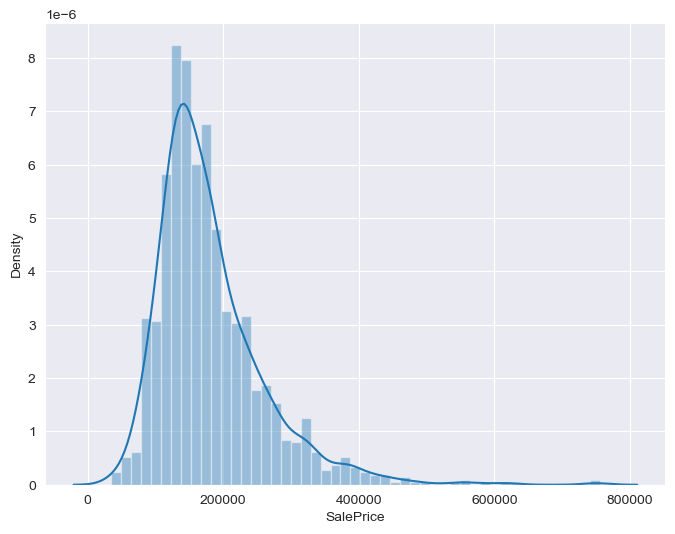

In [17]:
## let's analyse the target variable 'SalePrice'
plt.figure(figsize=[8,6])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);


<p> Looking at the graph it is visible that the target variable is right-skewed(positive skewness) </p>

In [20]:
## Let'sCheck the skewness of target variable
print("Skewness of SalesPrice:",df['SalePrice'].skew())

Skewness of SalesPrice: 1.8828757597682129


<p> As a general guidance, If skewness is less than -1 or greater than 1, the distribution is highly skewed. Since the skewness for target variable is > 1, we can confirm it is highly skewed </p>

In [21]:
## Let's Check the kurtosis of target variable
print("Kurtosis of SalesPrice:",df['SalePrice'].kurt())

Kurtosis of SalesPrice: 6.536281860064529


<p> If the kurtosis is greater than 3, then the dataset has heavier tails than a normal distribution </p>

In [22]:
## Log transform the target variable
df['SalePrice'] = np.log(df['SalePrice'])

In [23]:
## Let'sCheck the skewness and kurtosis of target variable after log transform
print("Skewness of SalesPrice:",df['SalePrice'].skew())
print("Kurtosis of SalesPrice:",df['SalePrice'].kurt())

Skewness of SalesPrice: 0.12133506220520406
Kurtosis of SalesPrice: 0.8095319958036296


<p> As a general guideline, a skewness value between −1 and +1 is considered excellent. Both kurtosis and skewness are less than 1. Our target variable should have normal distribution now </p>

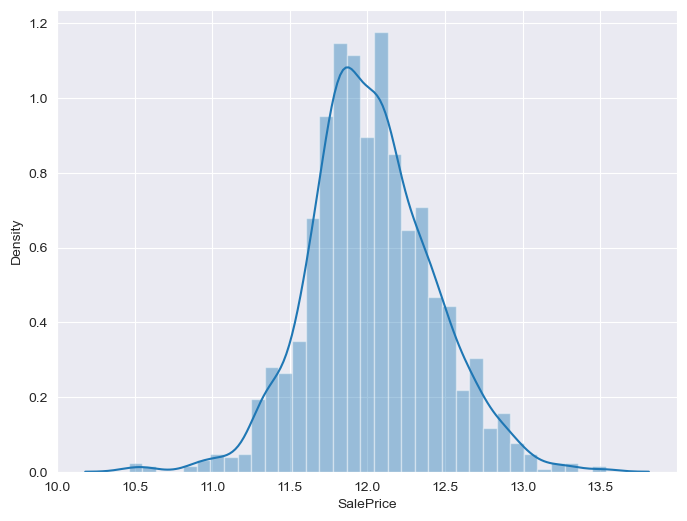

In [24]:
## let's analyse the target variable 'SalePrice'
plt.figure(figsize=[8,6])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

### EDA

In [25]:
## Let's Divide the dataframe df into numerical and categorical columns for EDA

## Extract numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0   1         65.0     8450       2003          2003       196.0         706   
1   2         80.0     9600       1976          1976         0.0         978   
2   3         68.0    11250       2001          2002       162.0         486   
3   4         60.0     9550       1915          1970         0.0         216   
4   5         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2         548           0   
1             1             6           1           2         460         298   
2             1             6           1           2         608           0   
3             1             7           1           3         642           0   
4             1             9           1           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247694  
1       5    2007  12.109011  
2       9    2008  12.317167  
3       2    2006  11.849398  
4      12    2008  12.429216

In [26]:
## Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_cat.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave  None      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave  None      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave  None      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave  None      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave  None      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  KitchenQual Functional FireplaceQu GarageType GarageYrBlt GarageFinish  \
0          Gd        Typ        None     Attchd        2003          RFn   
1          TA        Typ          TA     Attchd        1976          RFn   
2          Gd        Typ          TA     Attchd        2001          RFn   
3          Gd        Typ          Gd     Detchd        1998          Unf   
4          Gd        Typ          TA     Attchd        2000          RFn   

  GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature SaleType  \
0         TA         TA          Y   None  None        None       WD   
1         TA         TA          Y   None  None        None       WD   
2         TA         TA          Y   None  None        None       WD   
3         TA         TA          Y   None  None        None       WD   
4         TA         TA          Y   None  None        None       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal

In [27]:
## Printing the both splited columns names
print("Numberic columns:",df_num.columns)
print("Categorical columns:",df_cat.columns)

Numberic columns: Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical columns: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinTyp

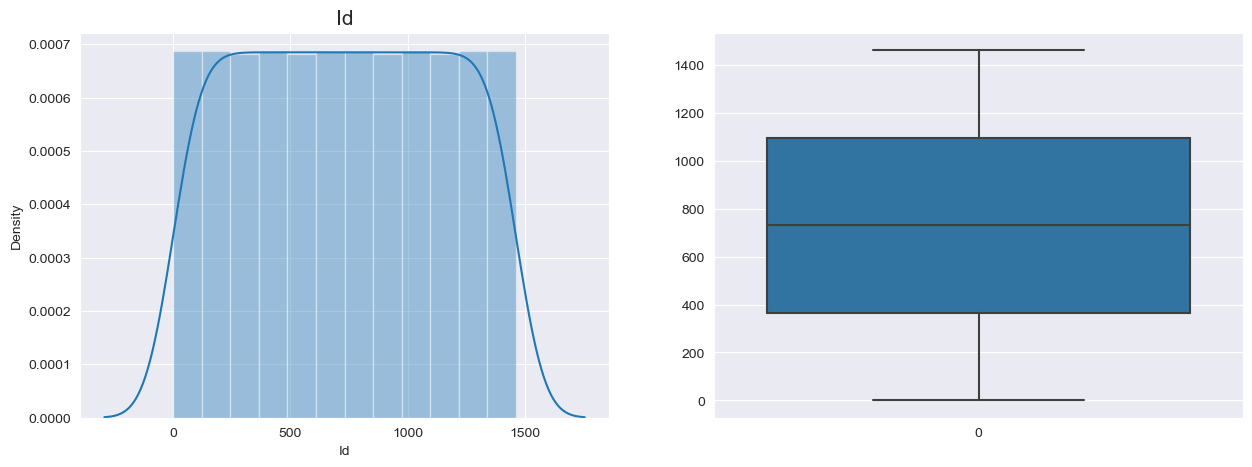

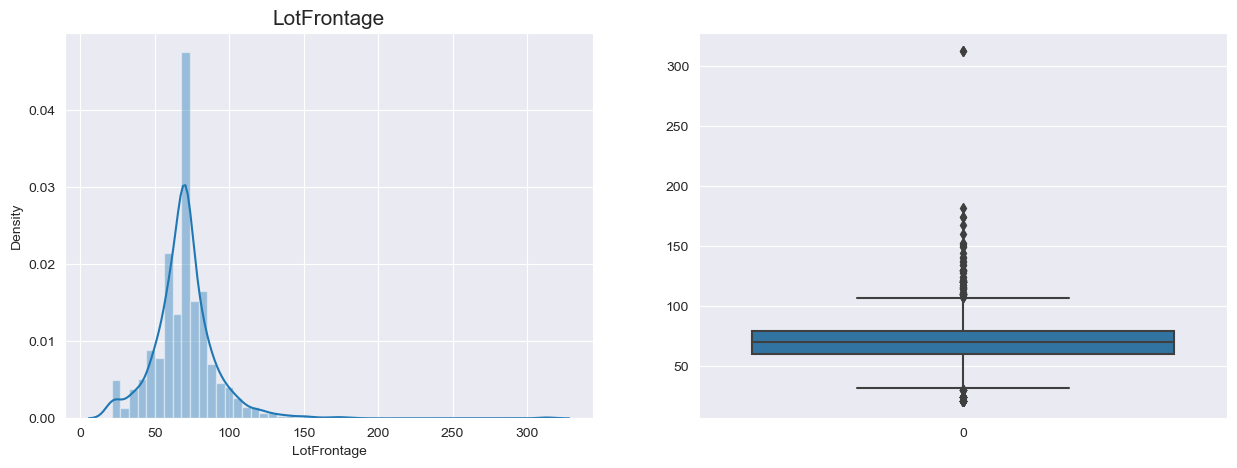

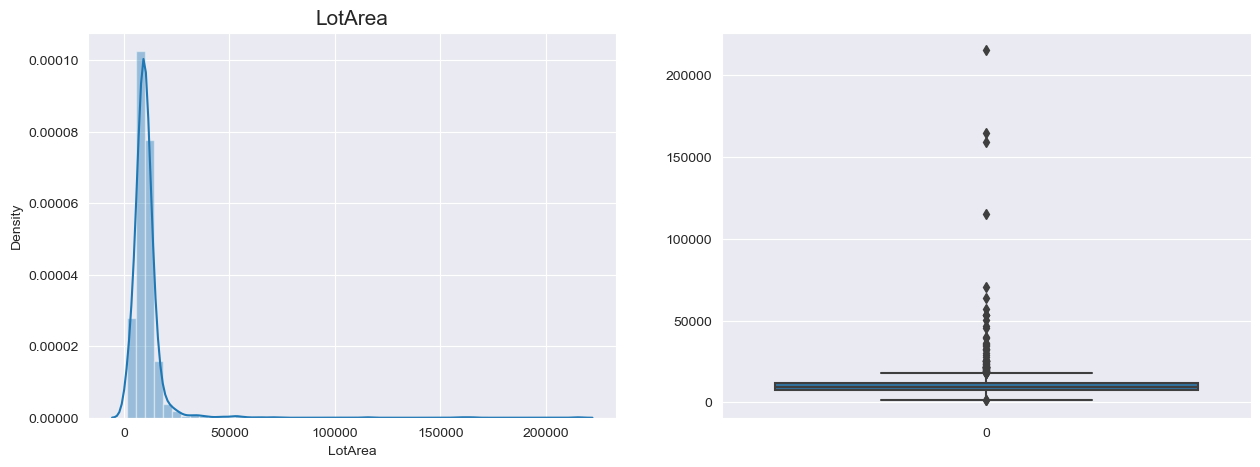

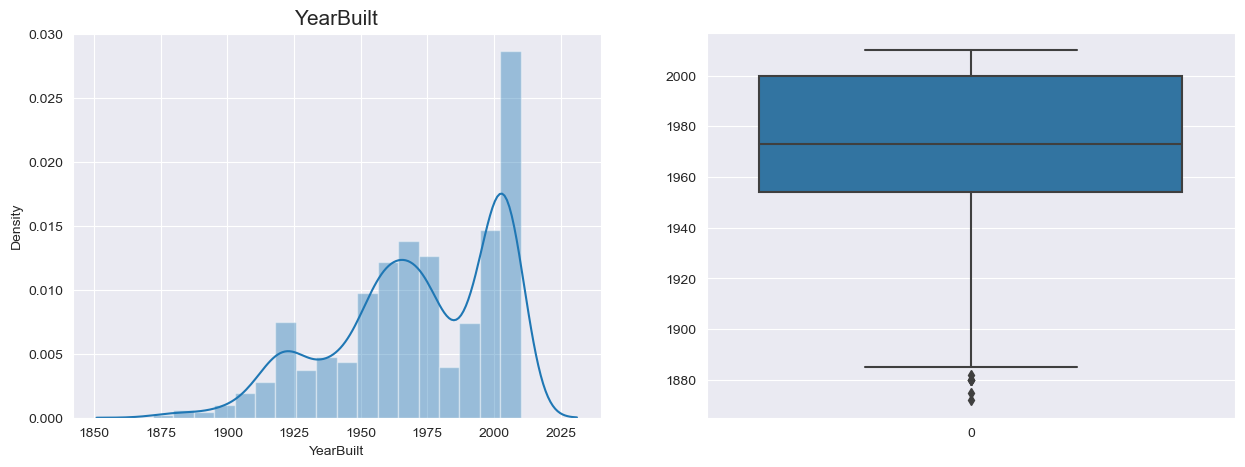

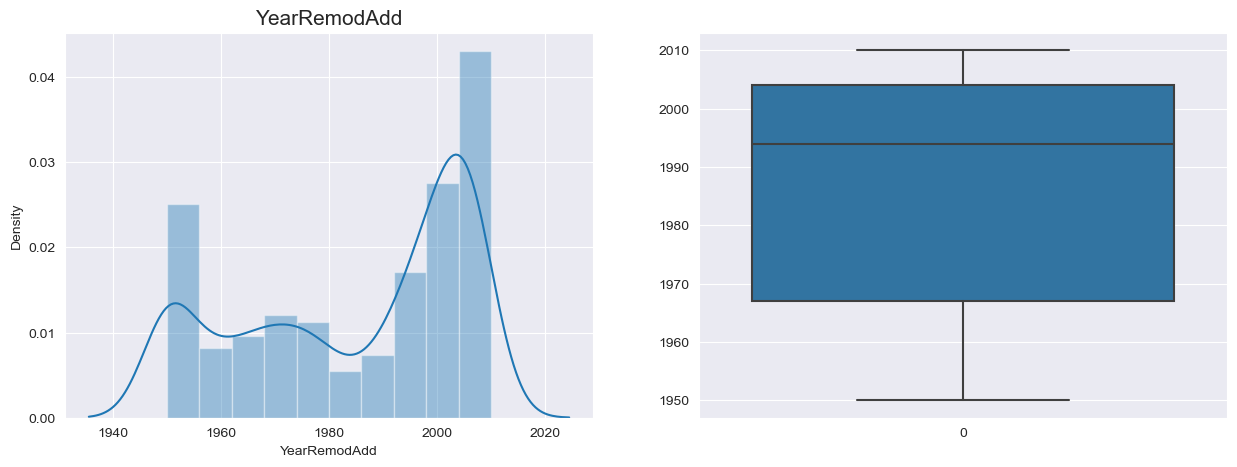

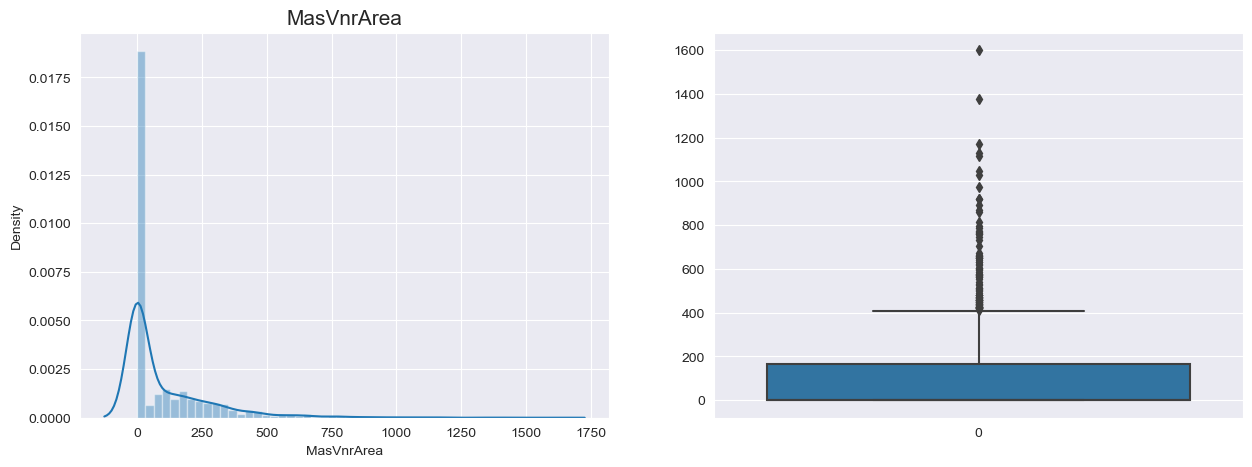

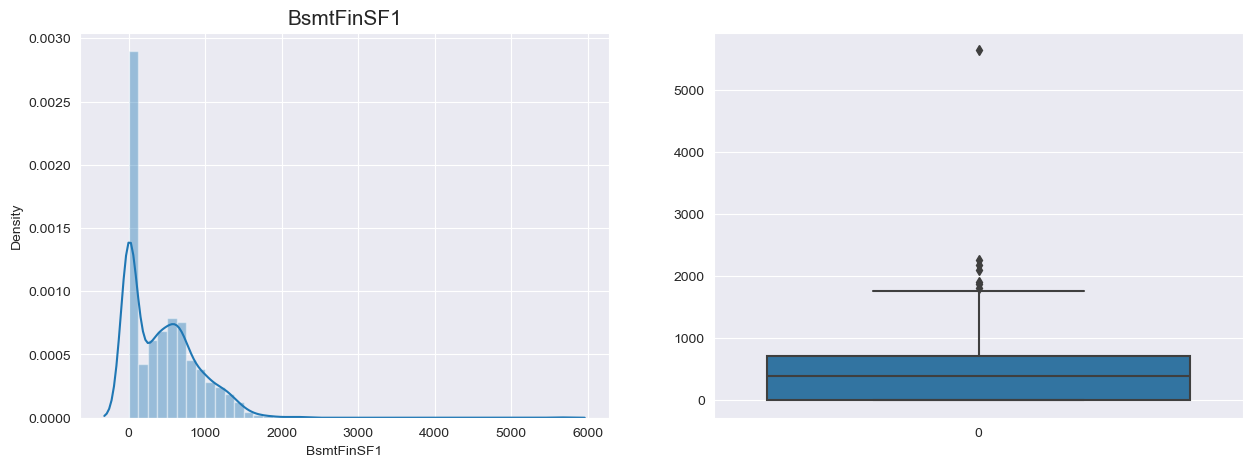

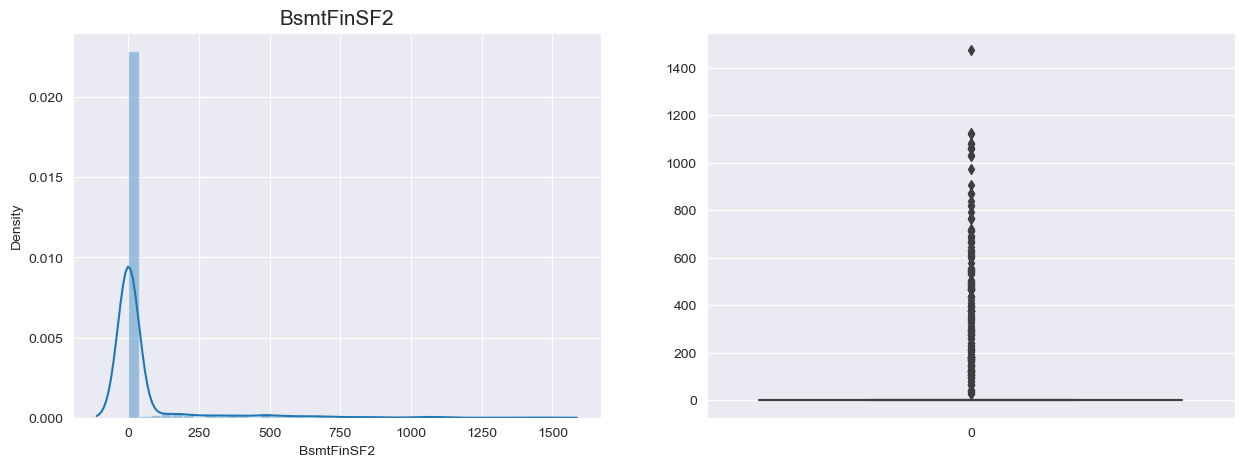

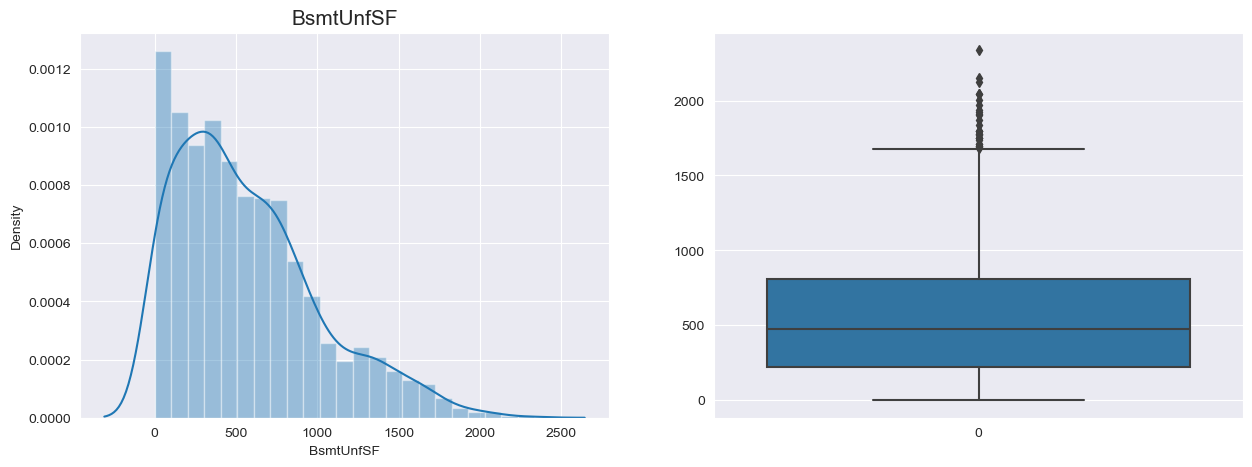

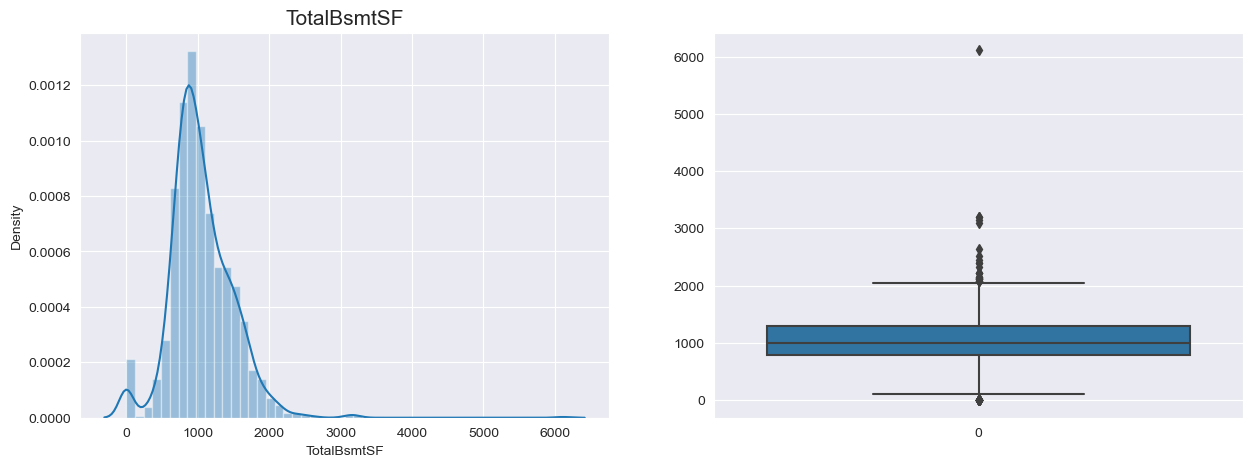

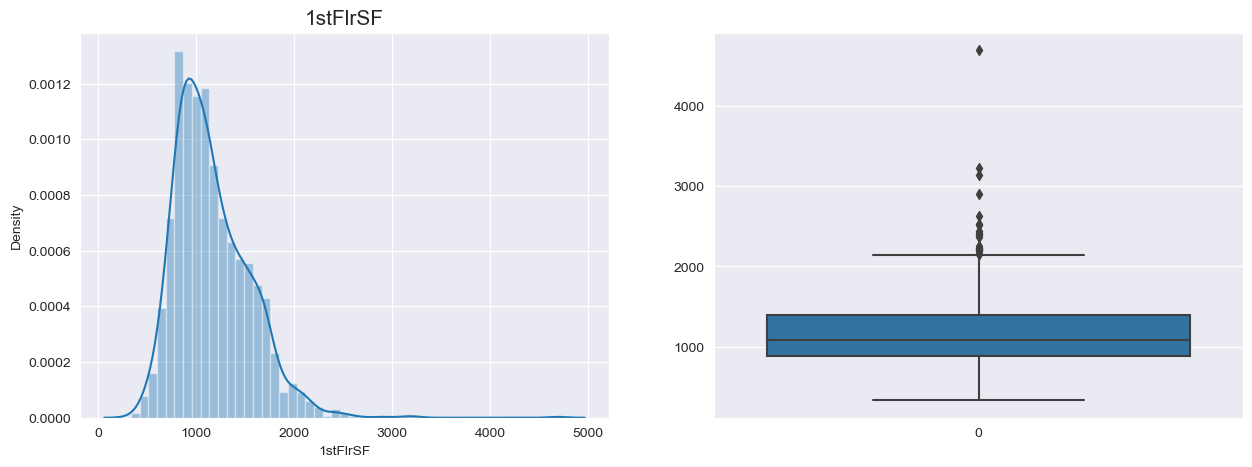

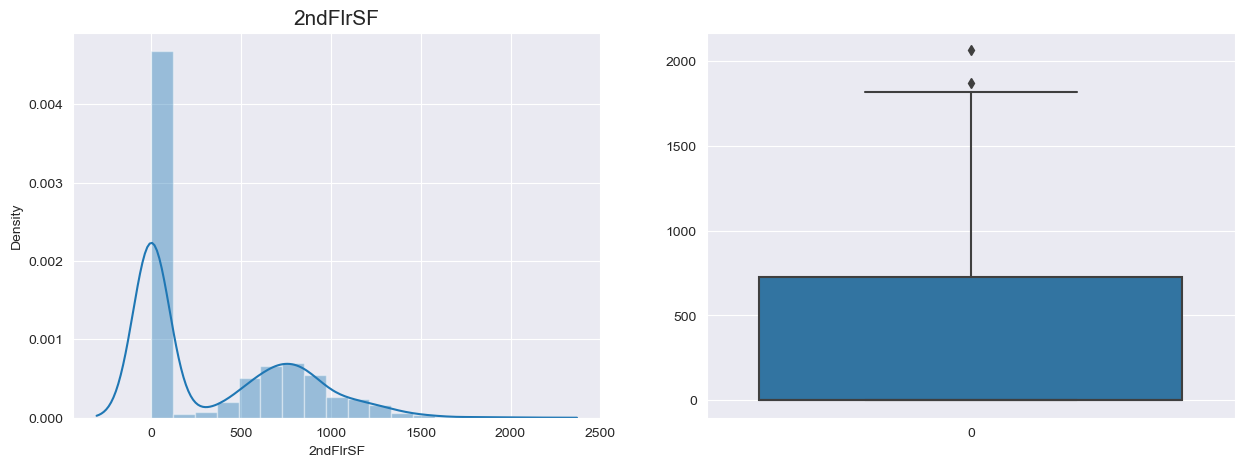

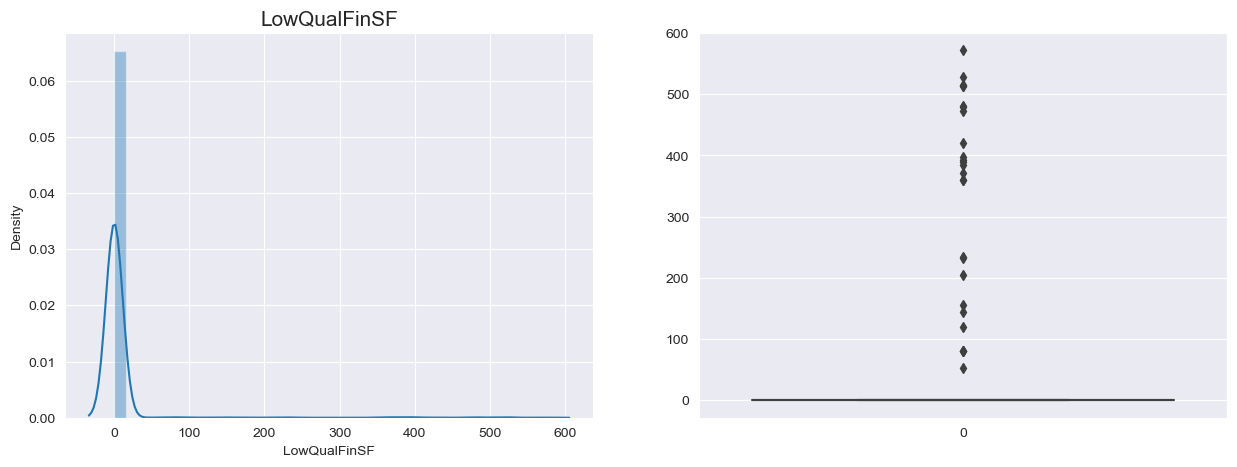

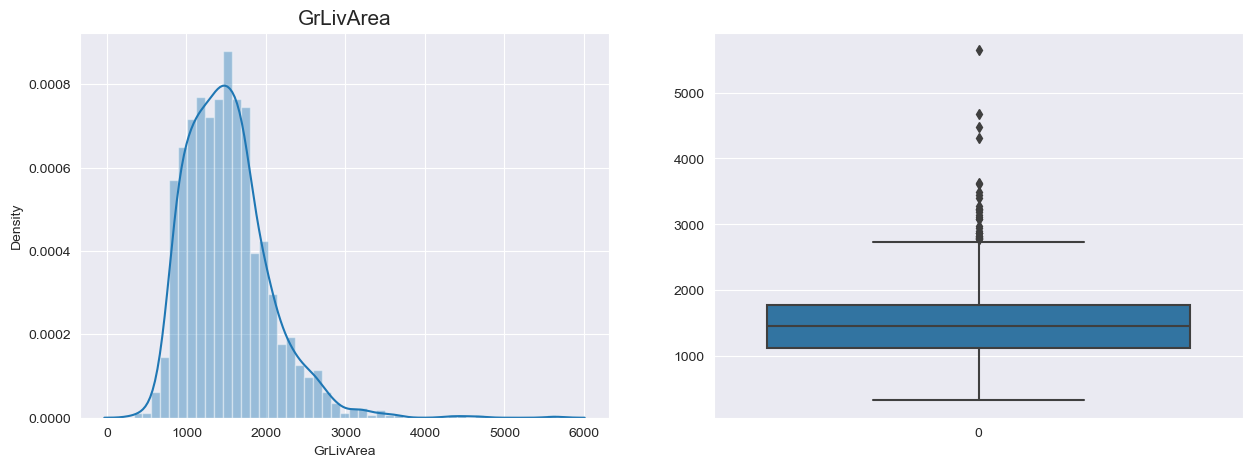

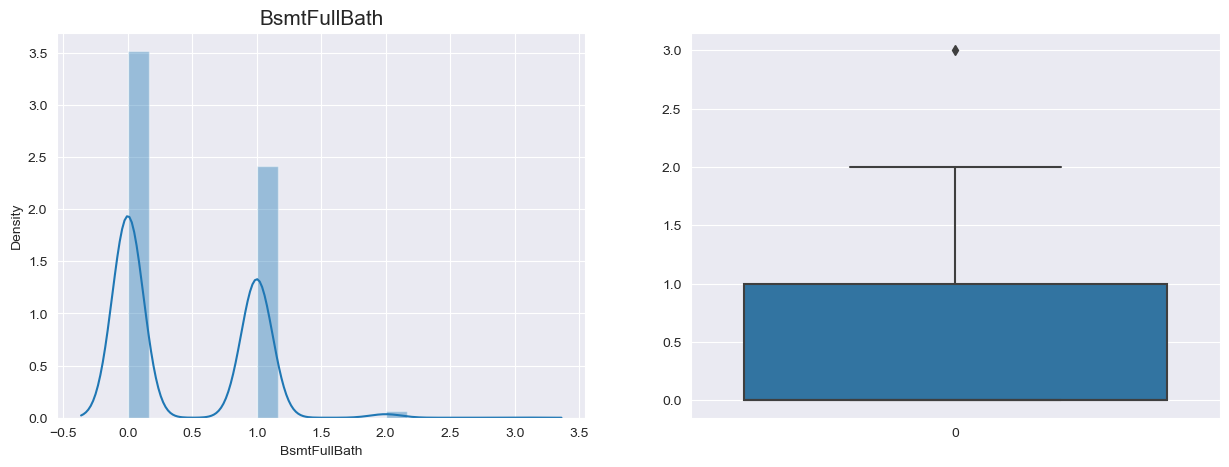

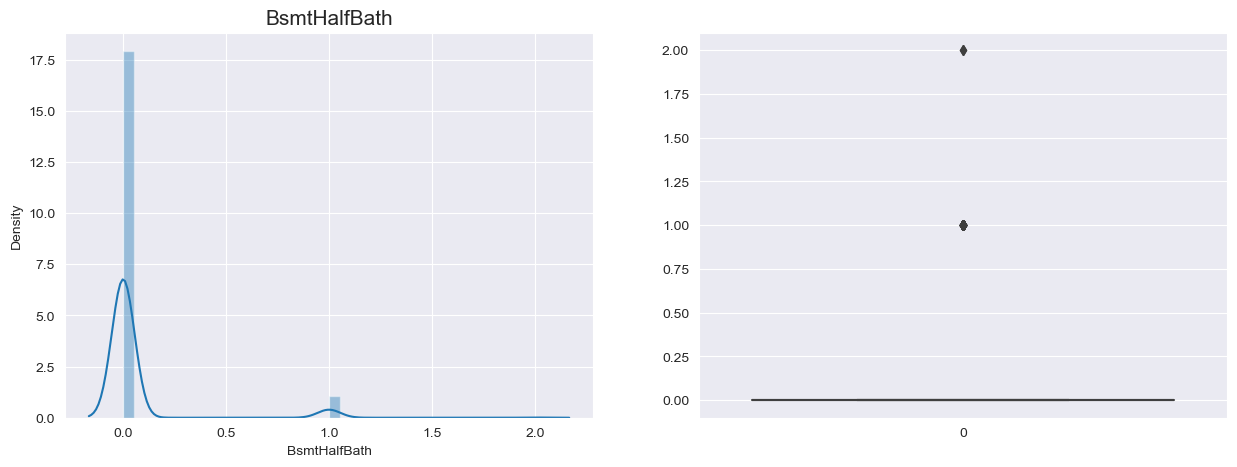

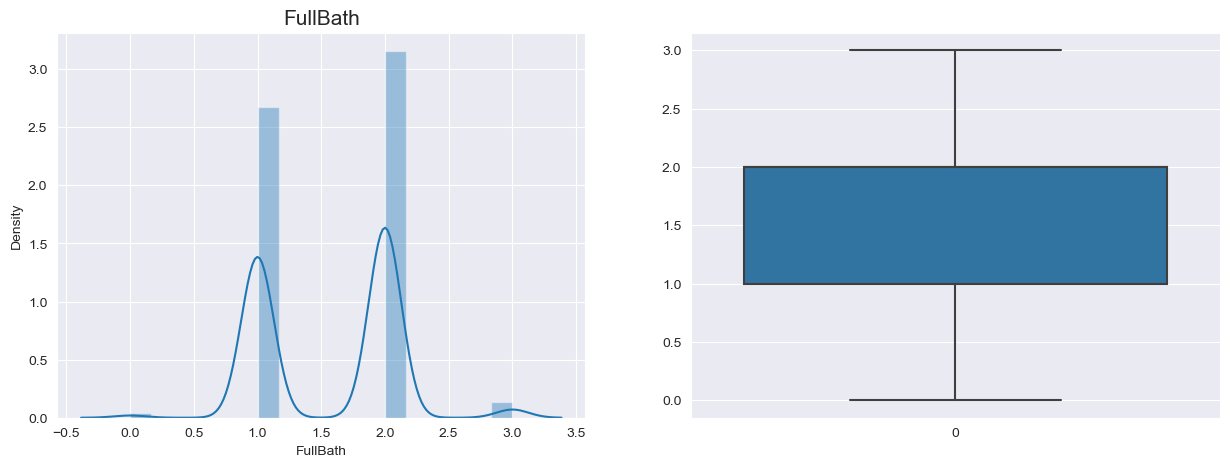

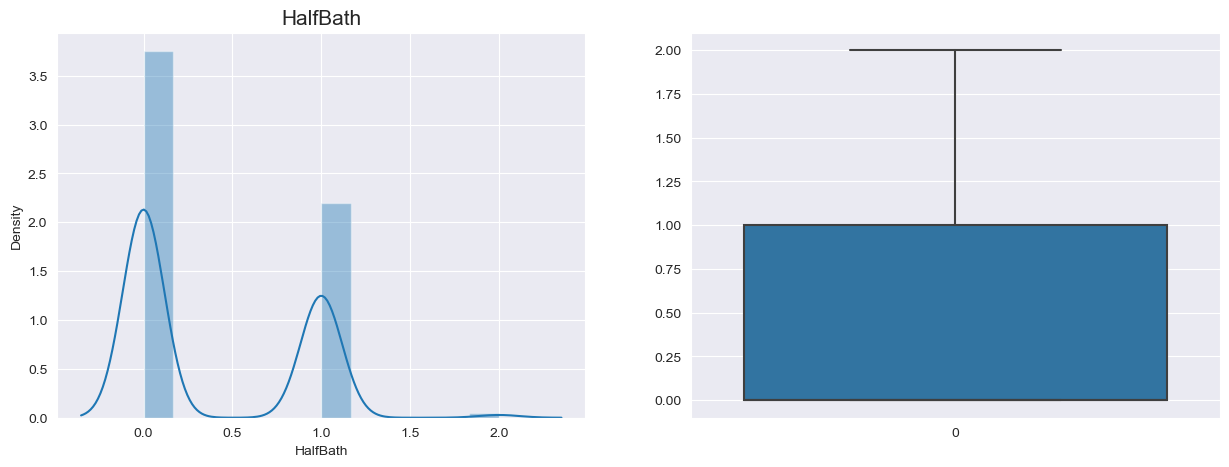

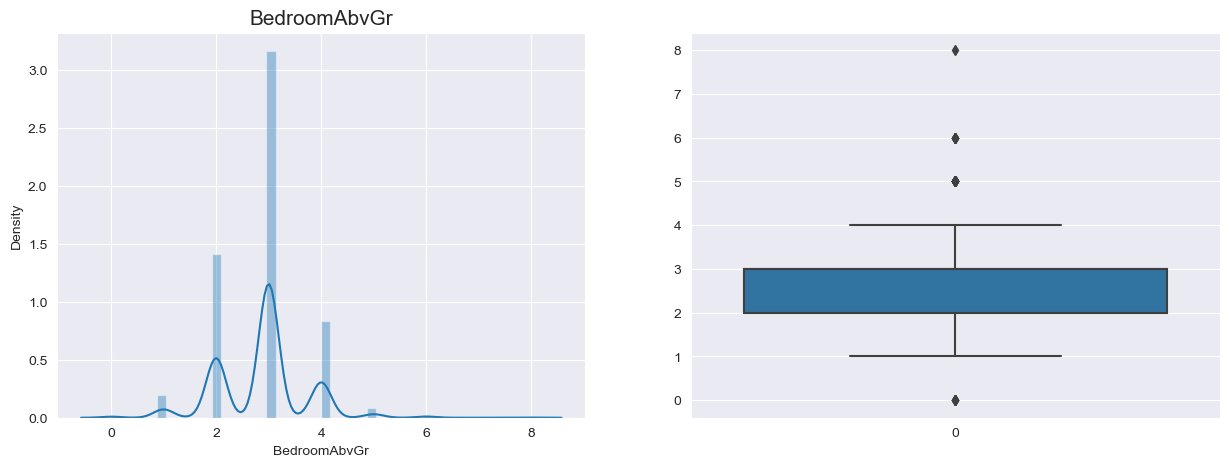

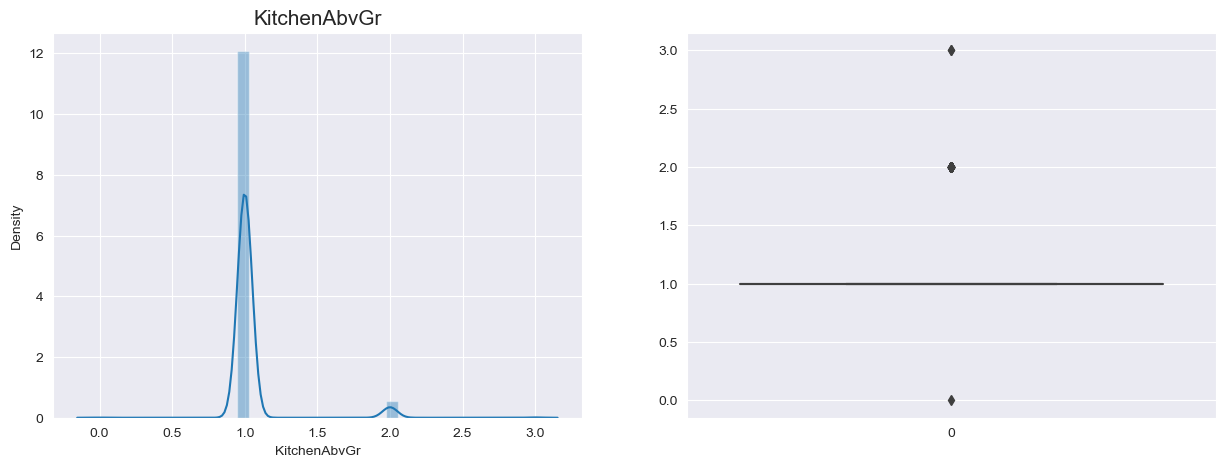

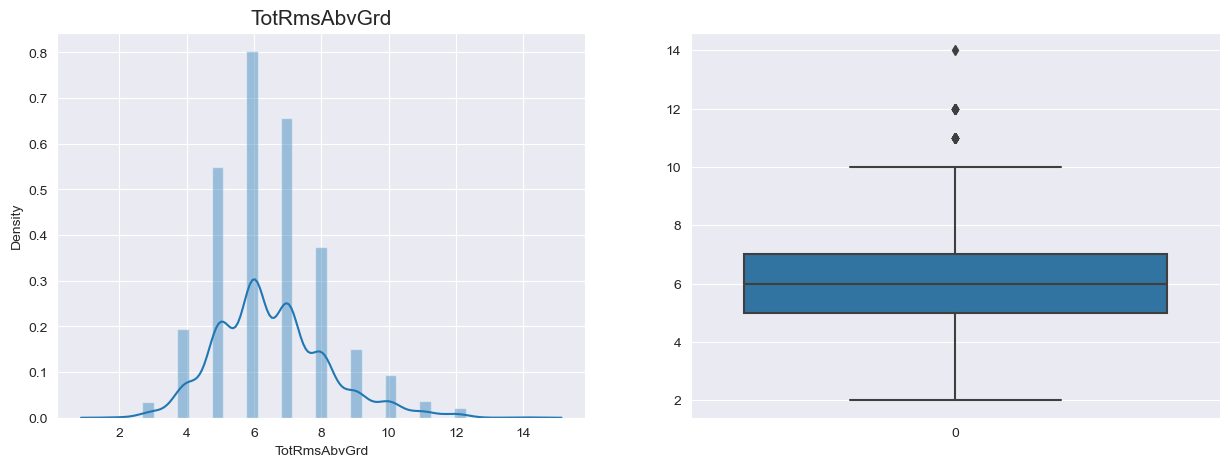

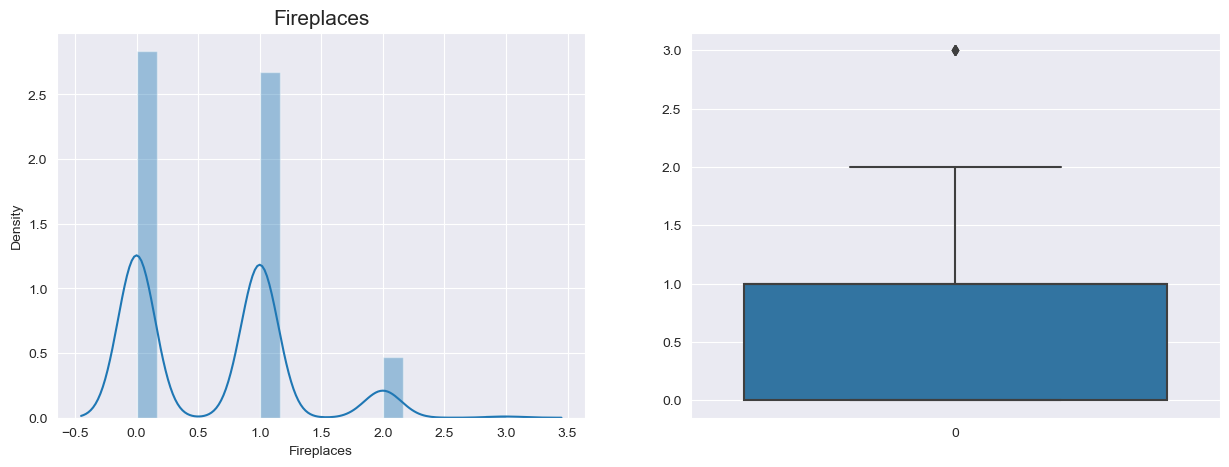

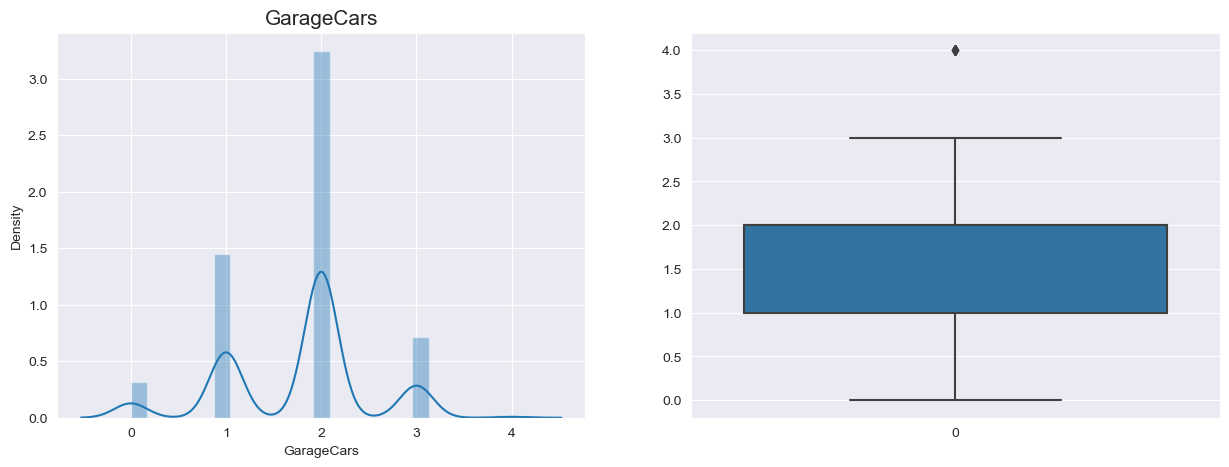

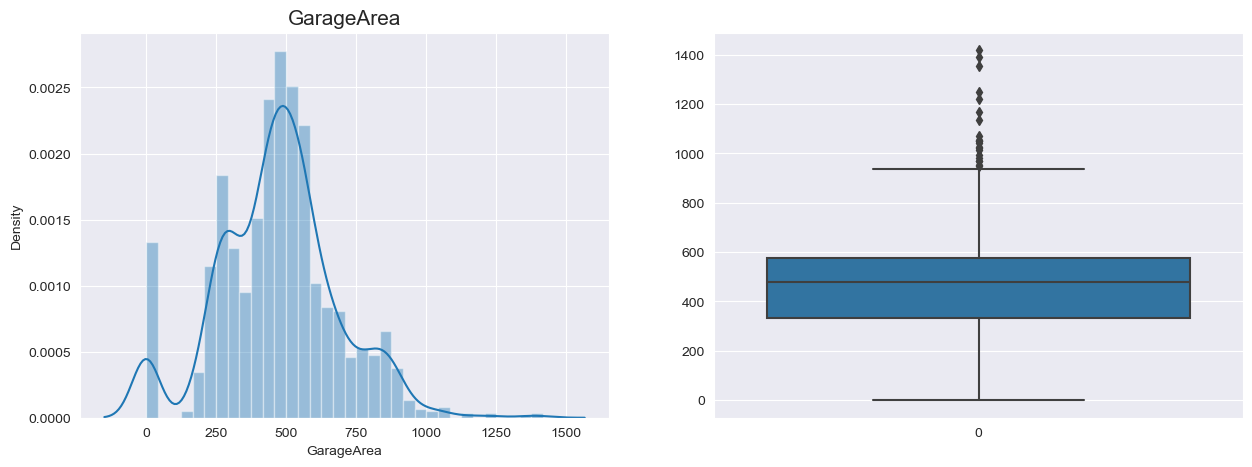

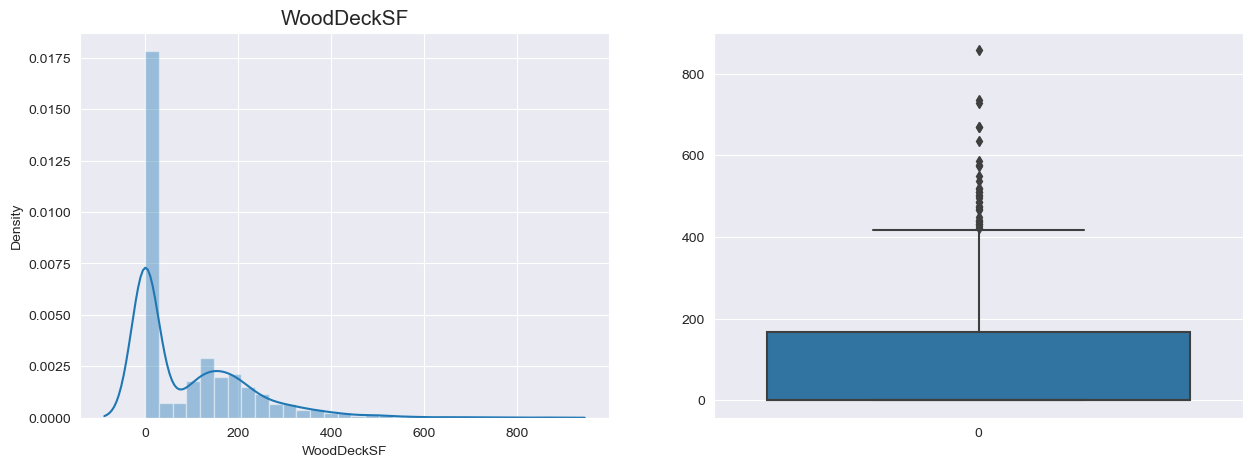

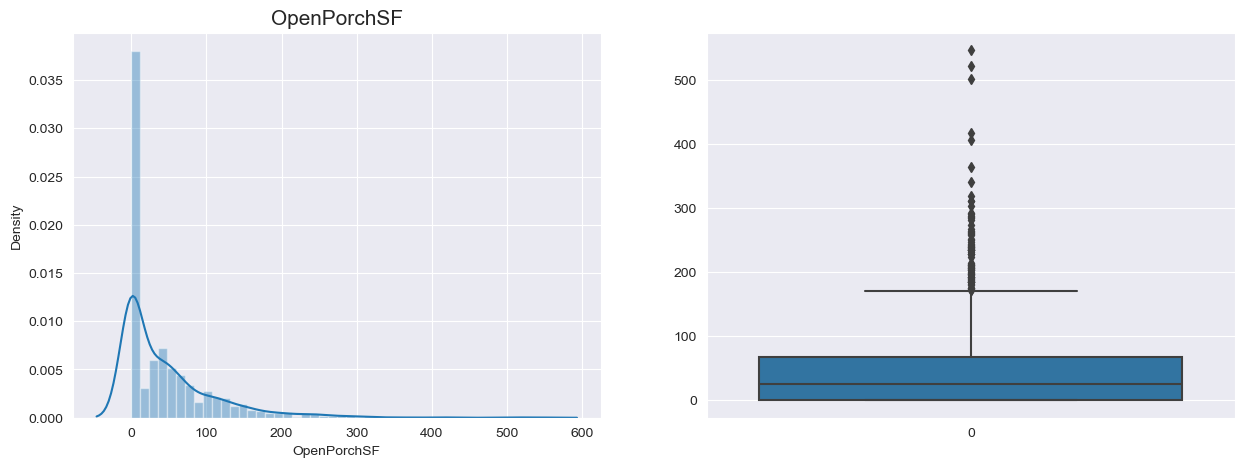

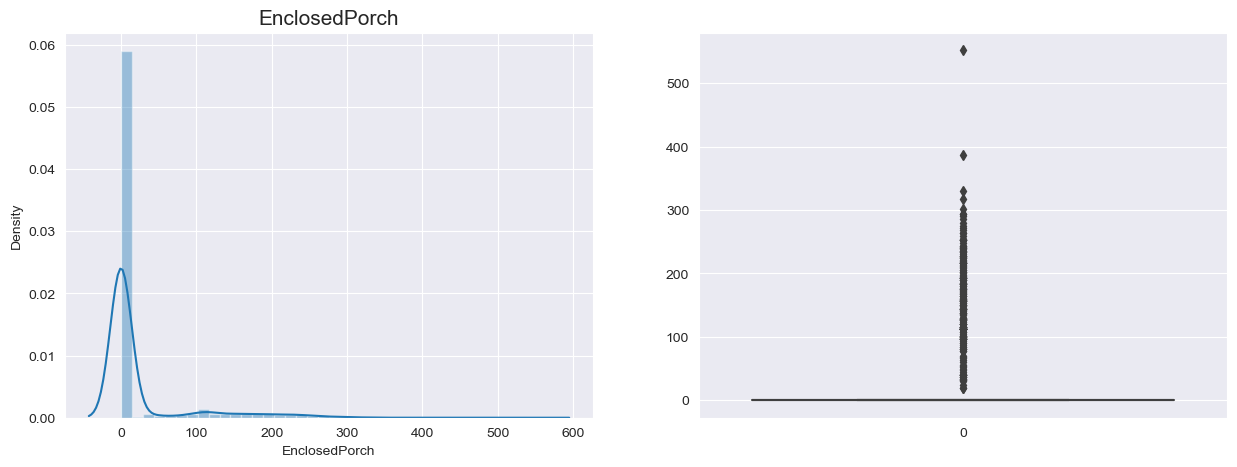

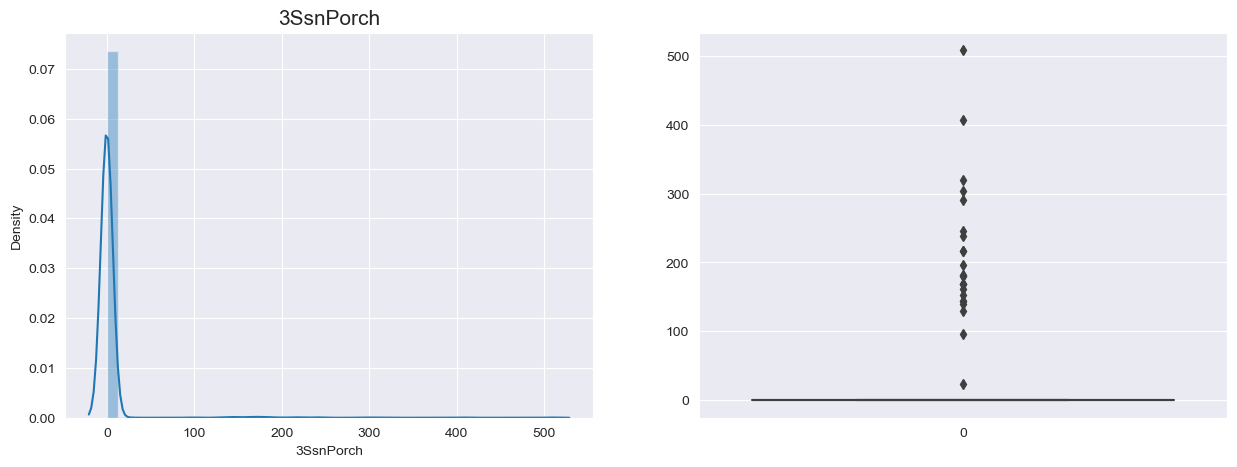

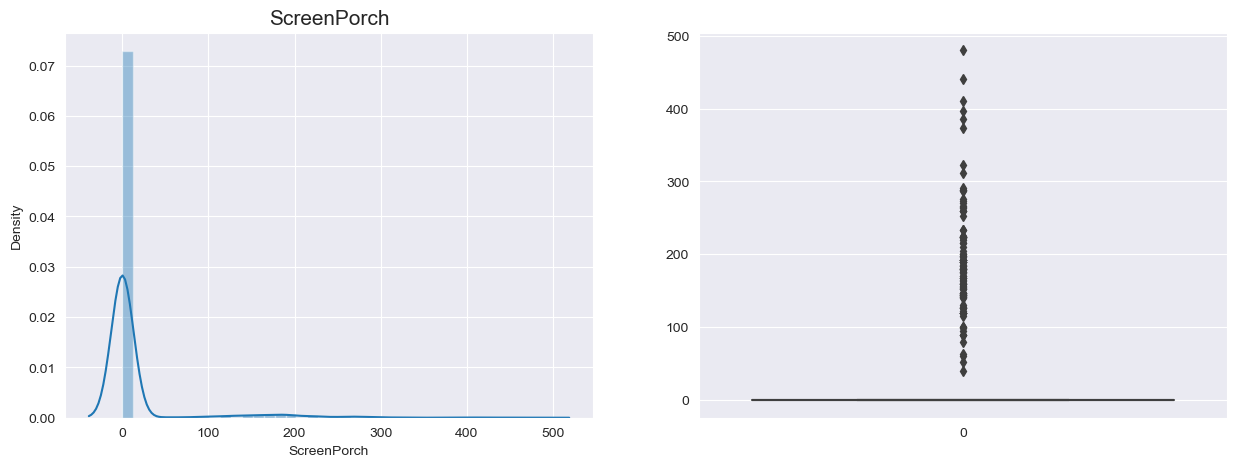

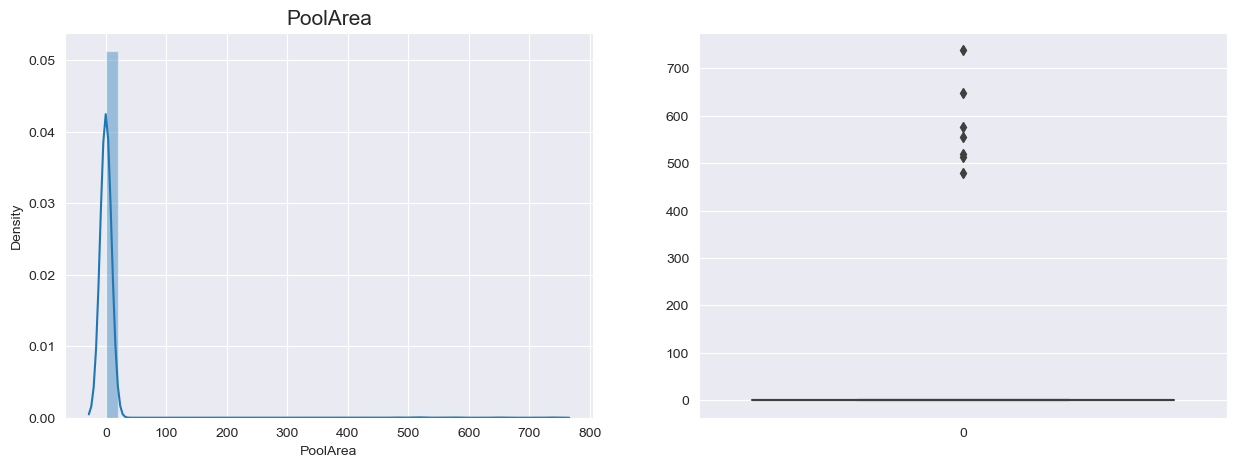

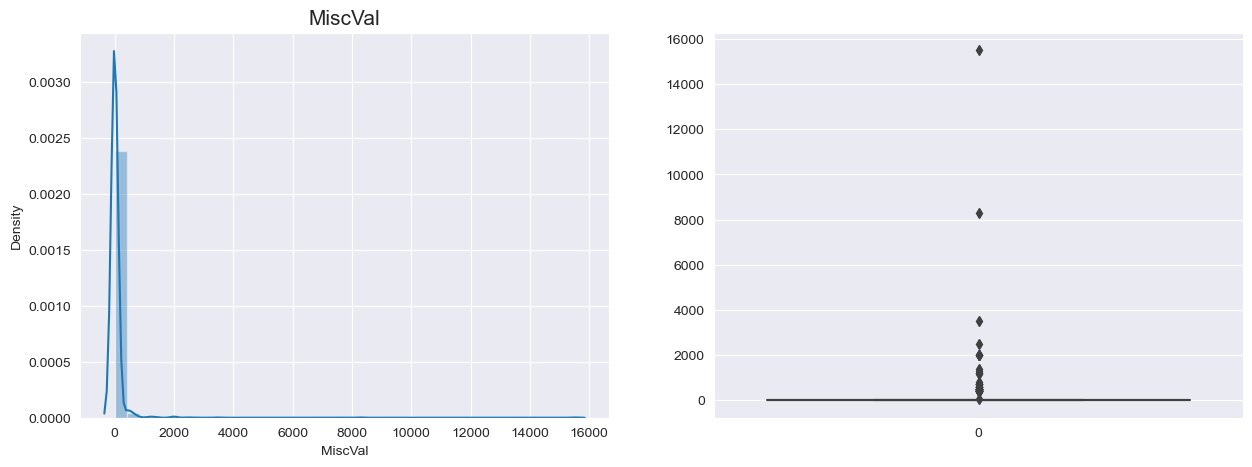

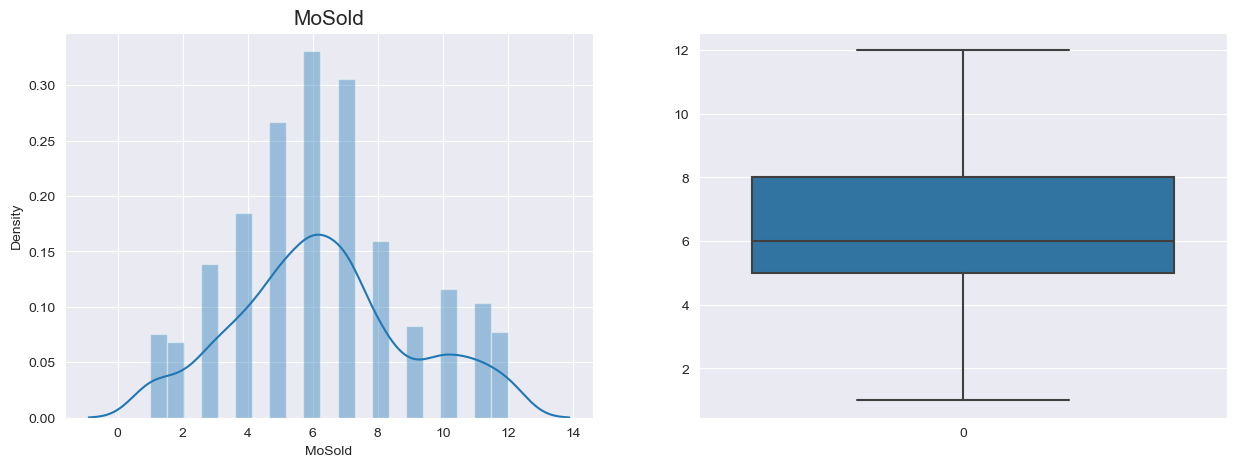

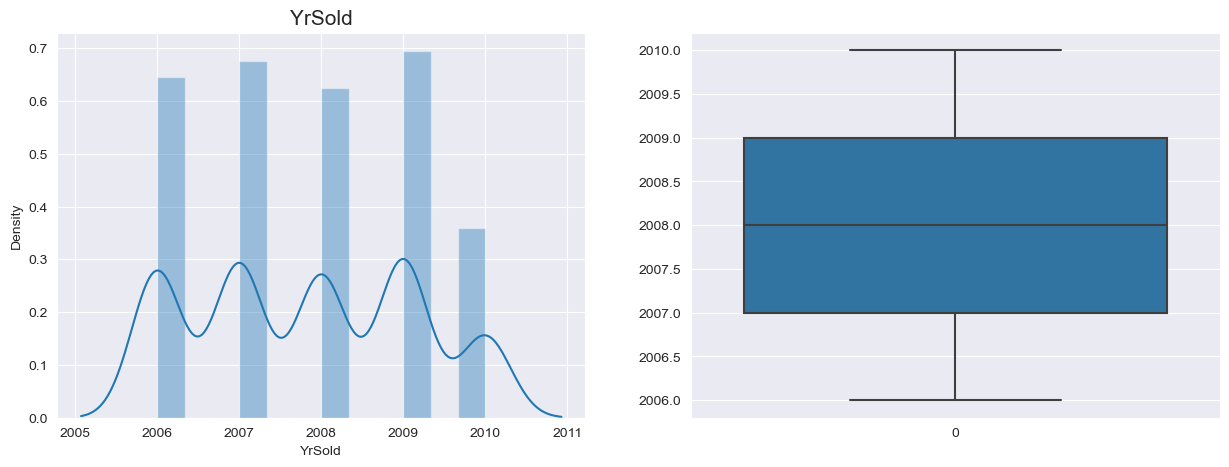

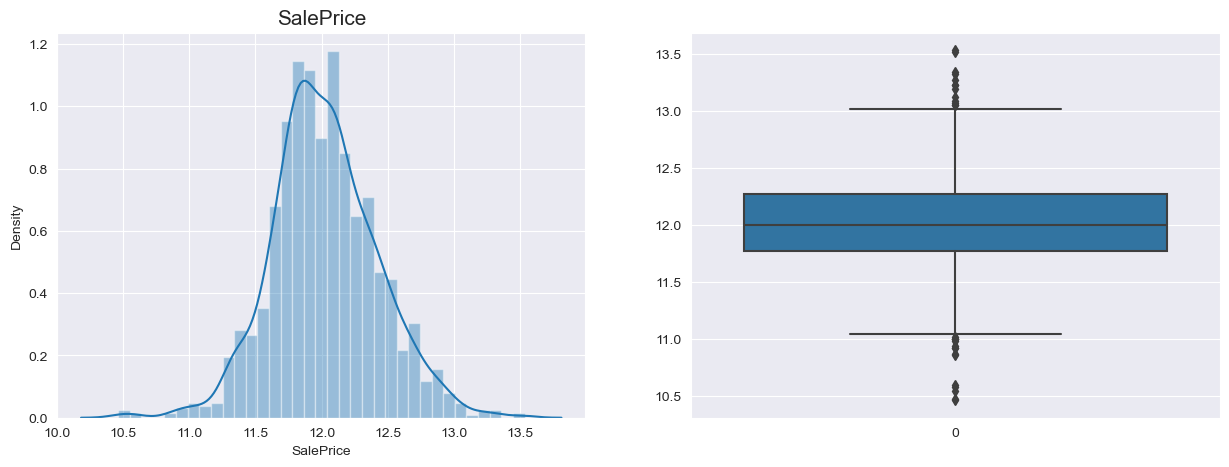

In [29]:
## View the distribution of all numeric variables using histograms and boxplots

for col in df_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 15})
    sns.distplot(df_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(df_num[col])
    plt.show()

##### Observations:
1. Most of the columns have non normal distribution
2. We can see the outliers as well.

In [122]:
## View the unique values of all Categorical columns
for col in df_cat.columns:
    print(col)
    print(df[col].unique(), '\n')

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

Street
['Pave' 'Grvl'] 

Alley
['None' 'Grvl' 'Pave'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LandContour
['Lvl' 'Bnk' 'Low' 'HLS'] 

Utilities
['AllPub' 'NoSeWa'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

LandSlope
['Gtl' 'Mod' 'Sev'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 

Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

OverallQual
[ 7  6  8  5  9  4 10  3  1  2] 

OverallCond
[5 8 6 7 4 2 3 9 

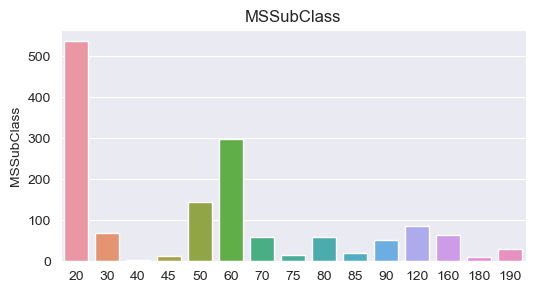

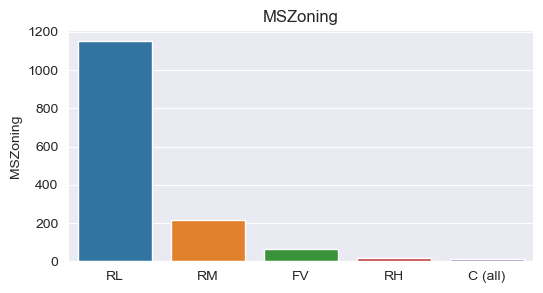

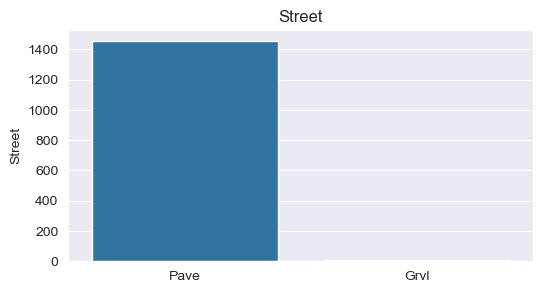

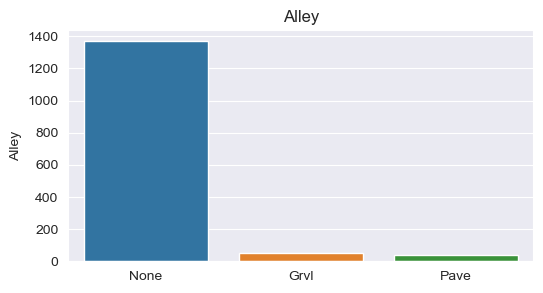

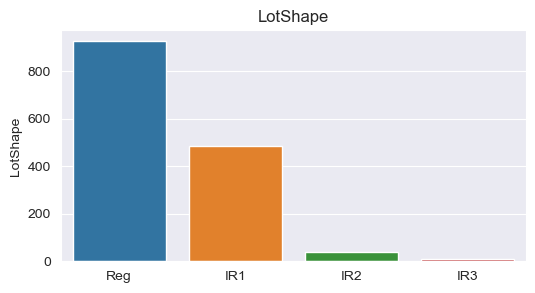

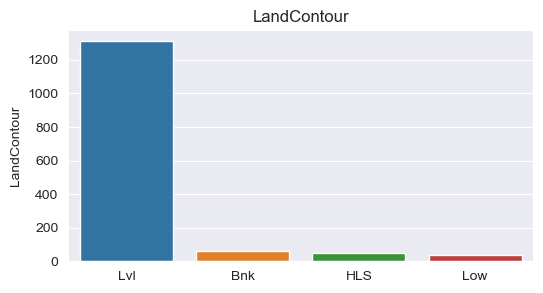

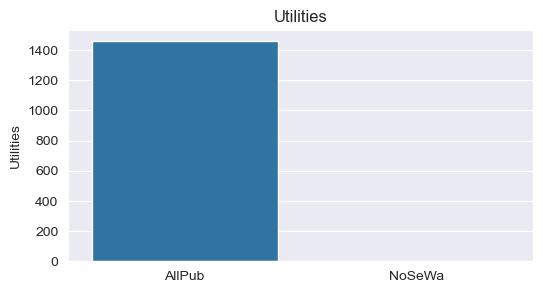

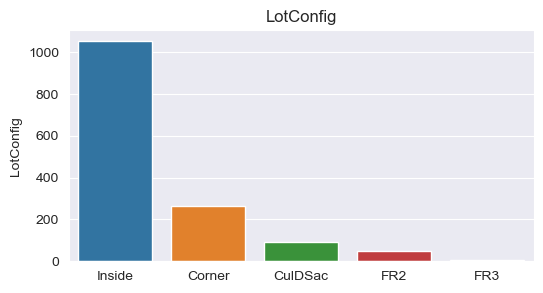

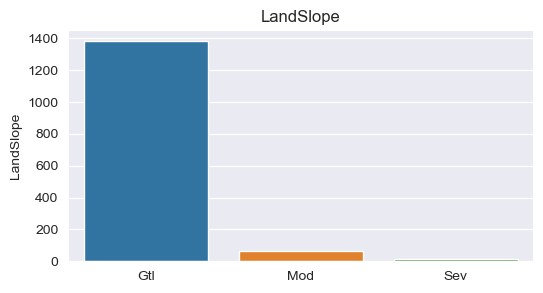

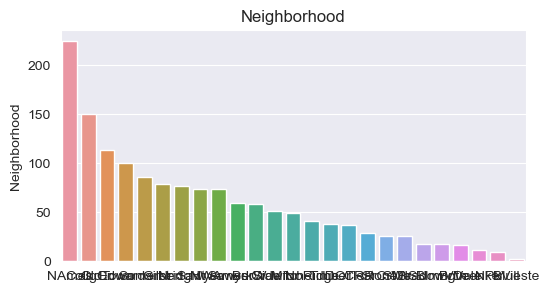

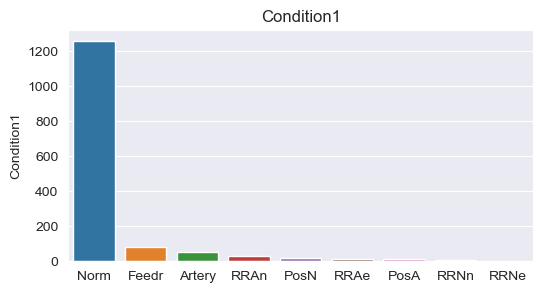

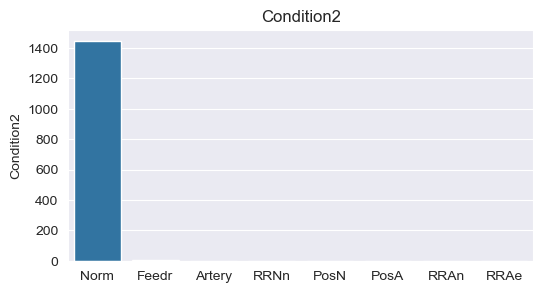

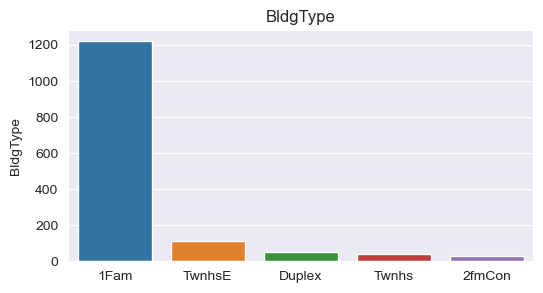

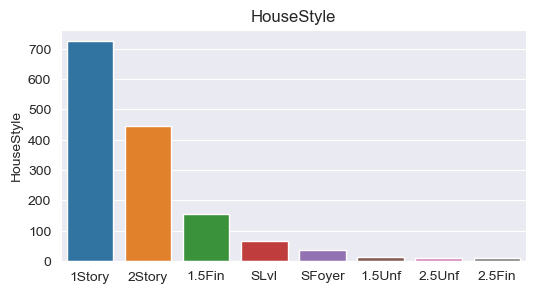

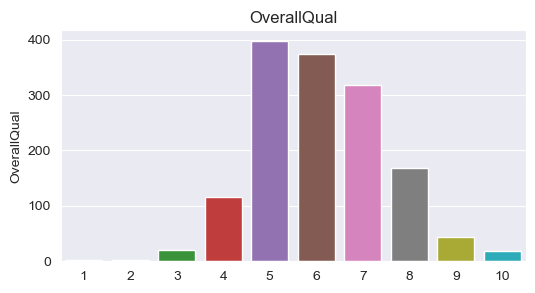

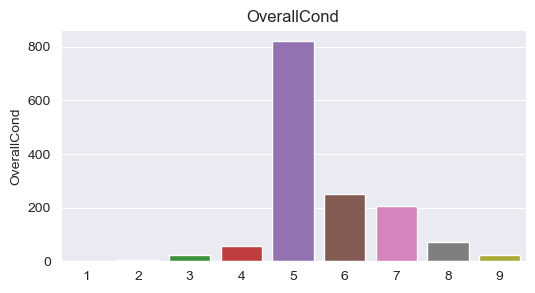

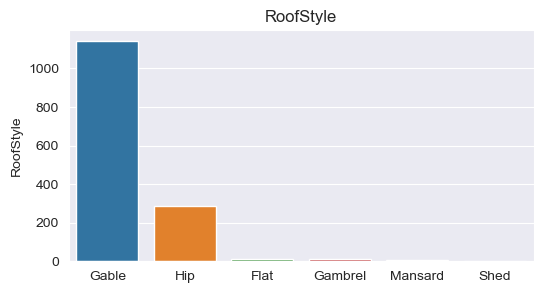

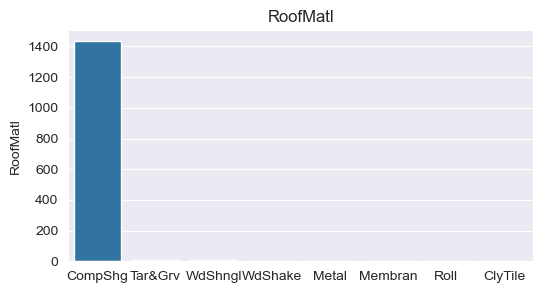

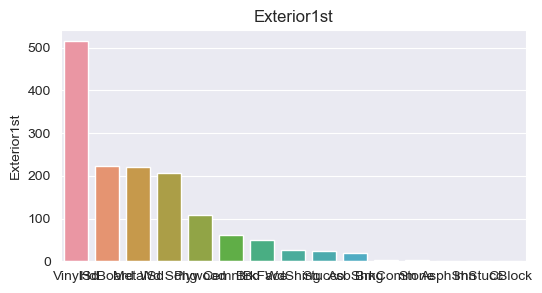

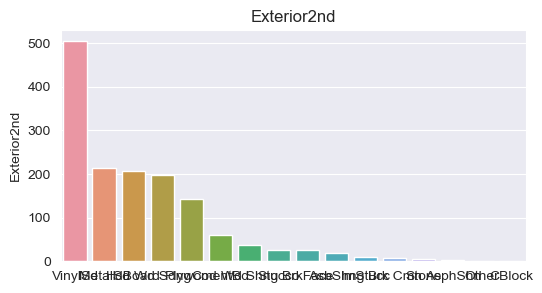

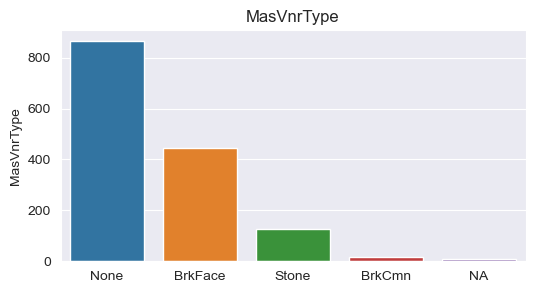

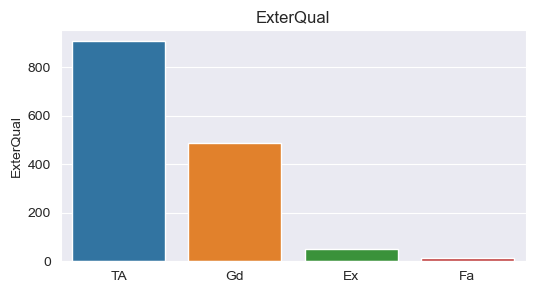

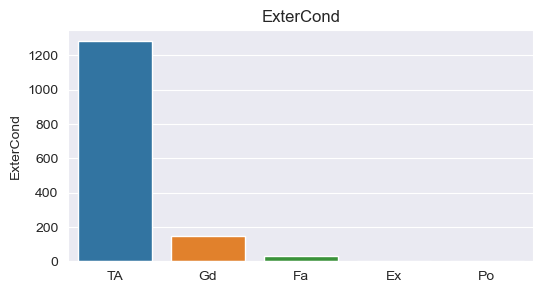

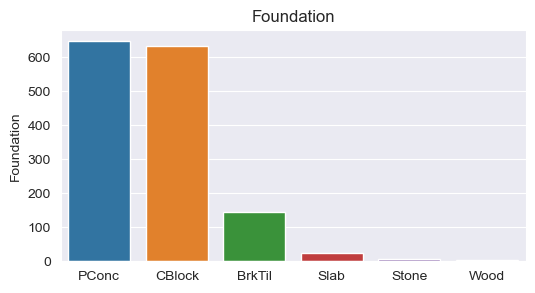

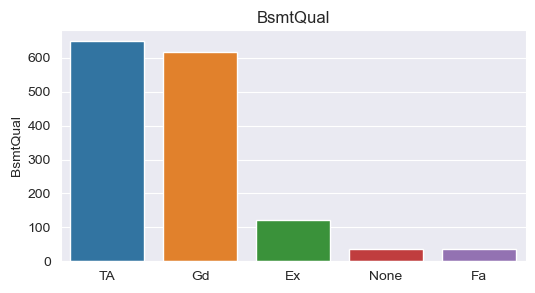

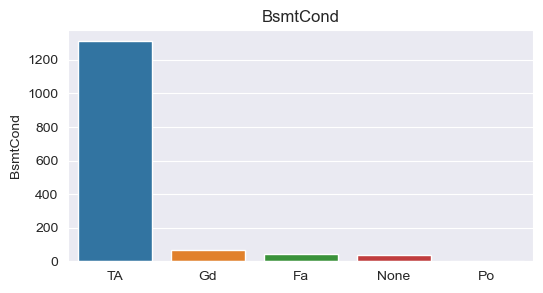

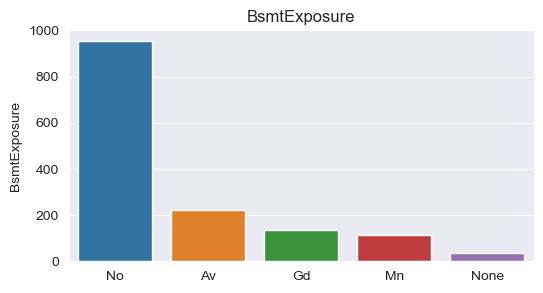

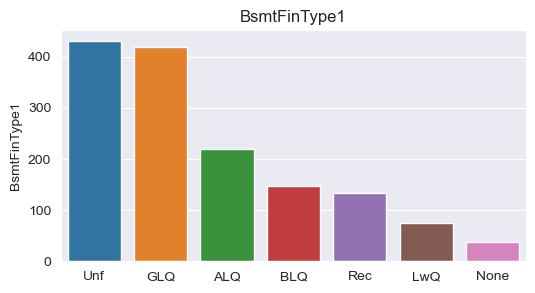

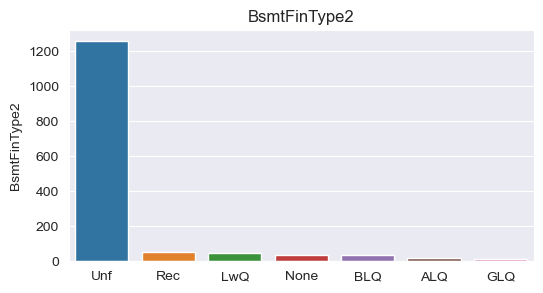

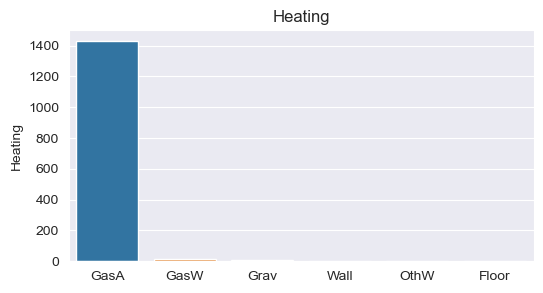

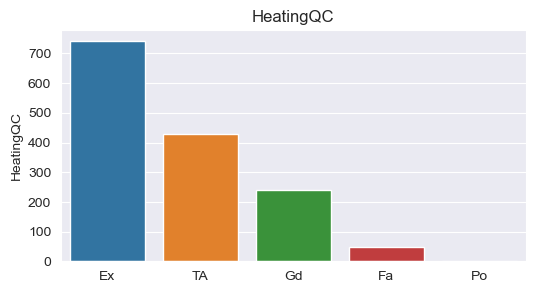

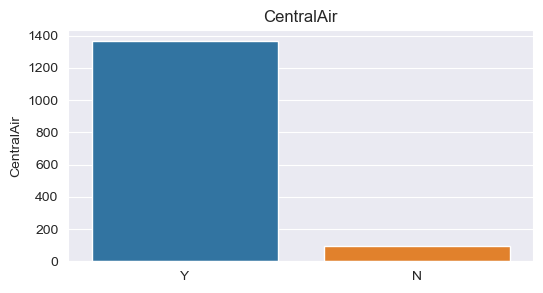

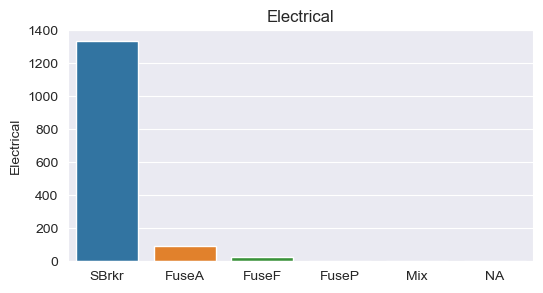

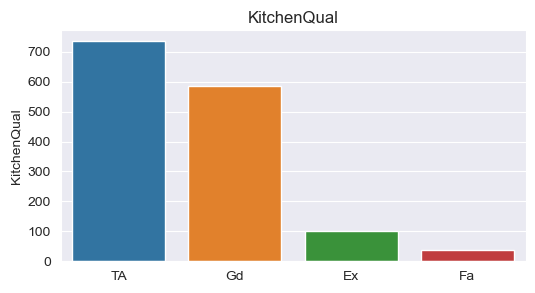

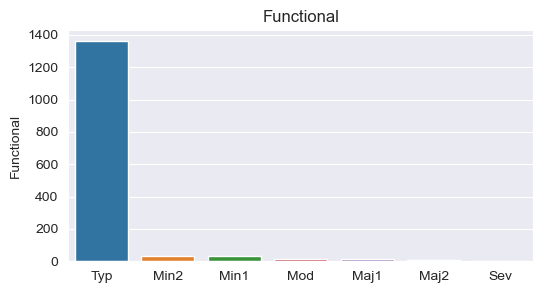

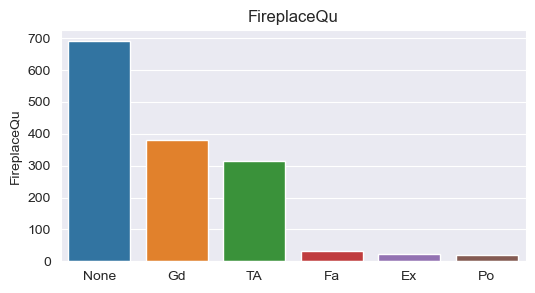

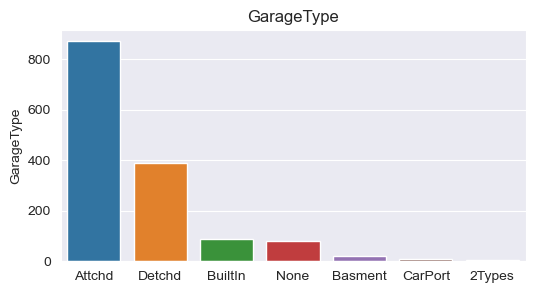

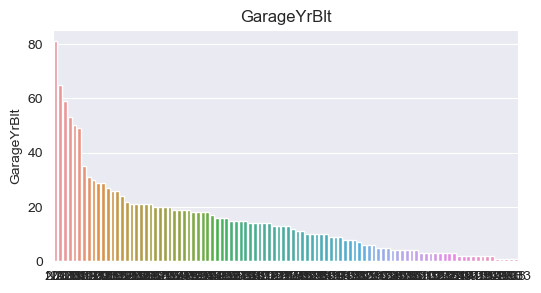

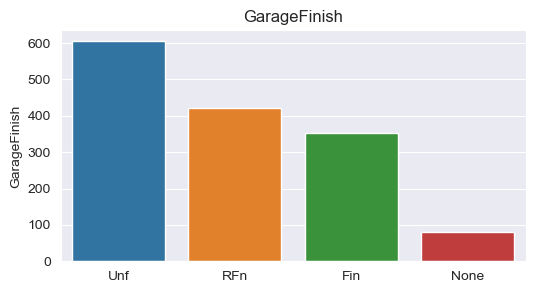

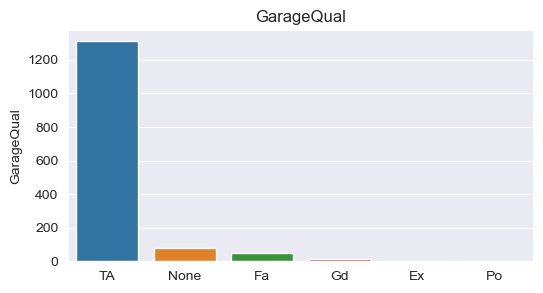

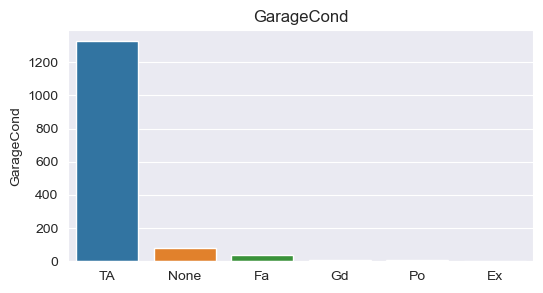

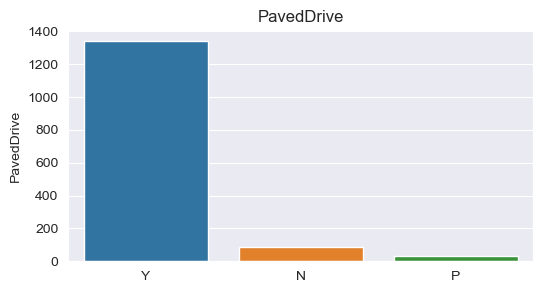

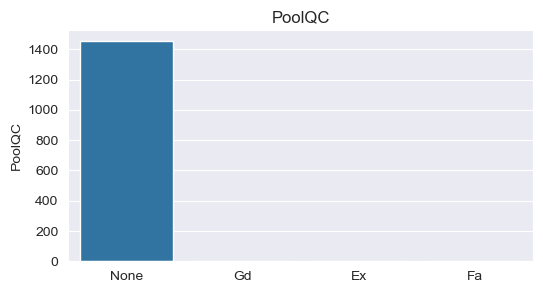

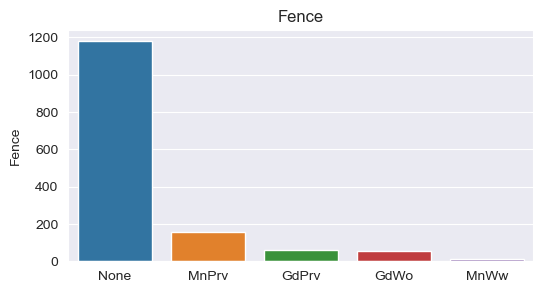

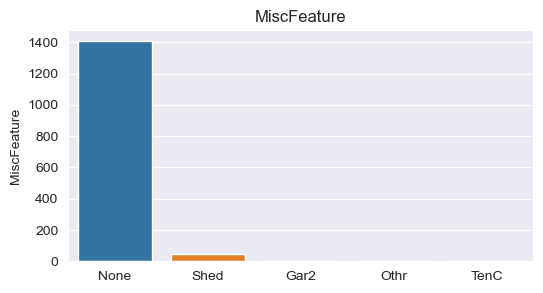

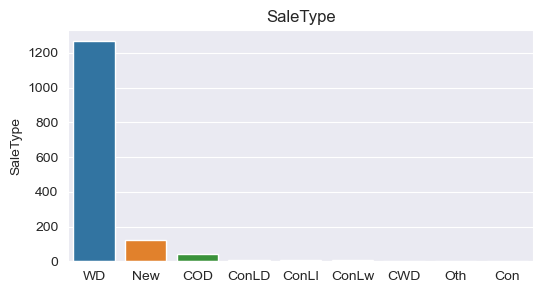

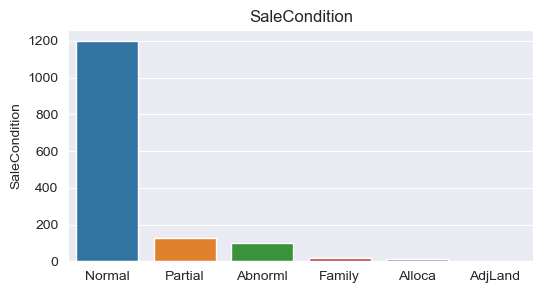

In [36]:
## Lets visualize the levels of categorical columns using bar plots
for col in df_cat.columns:
    plt.figure(figsize=(6,3))
    plt.title(col, fontdict={'fontsize': 12})
    sns.barplot(x=df_cat[col].value_counts().index, y=df_cat[col].value_counts())
    plt.show()

<p> Let's look at the corelation between variables(Bivariate Analysis) </p>

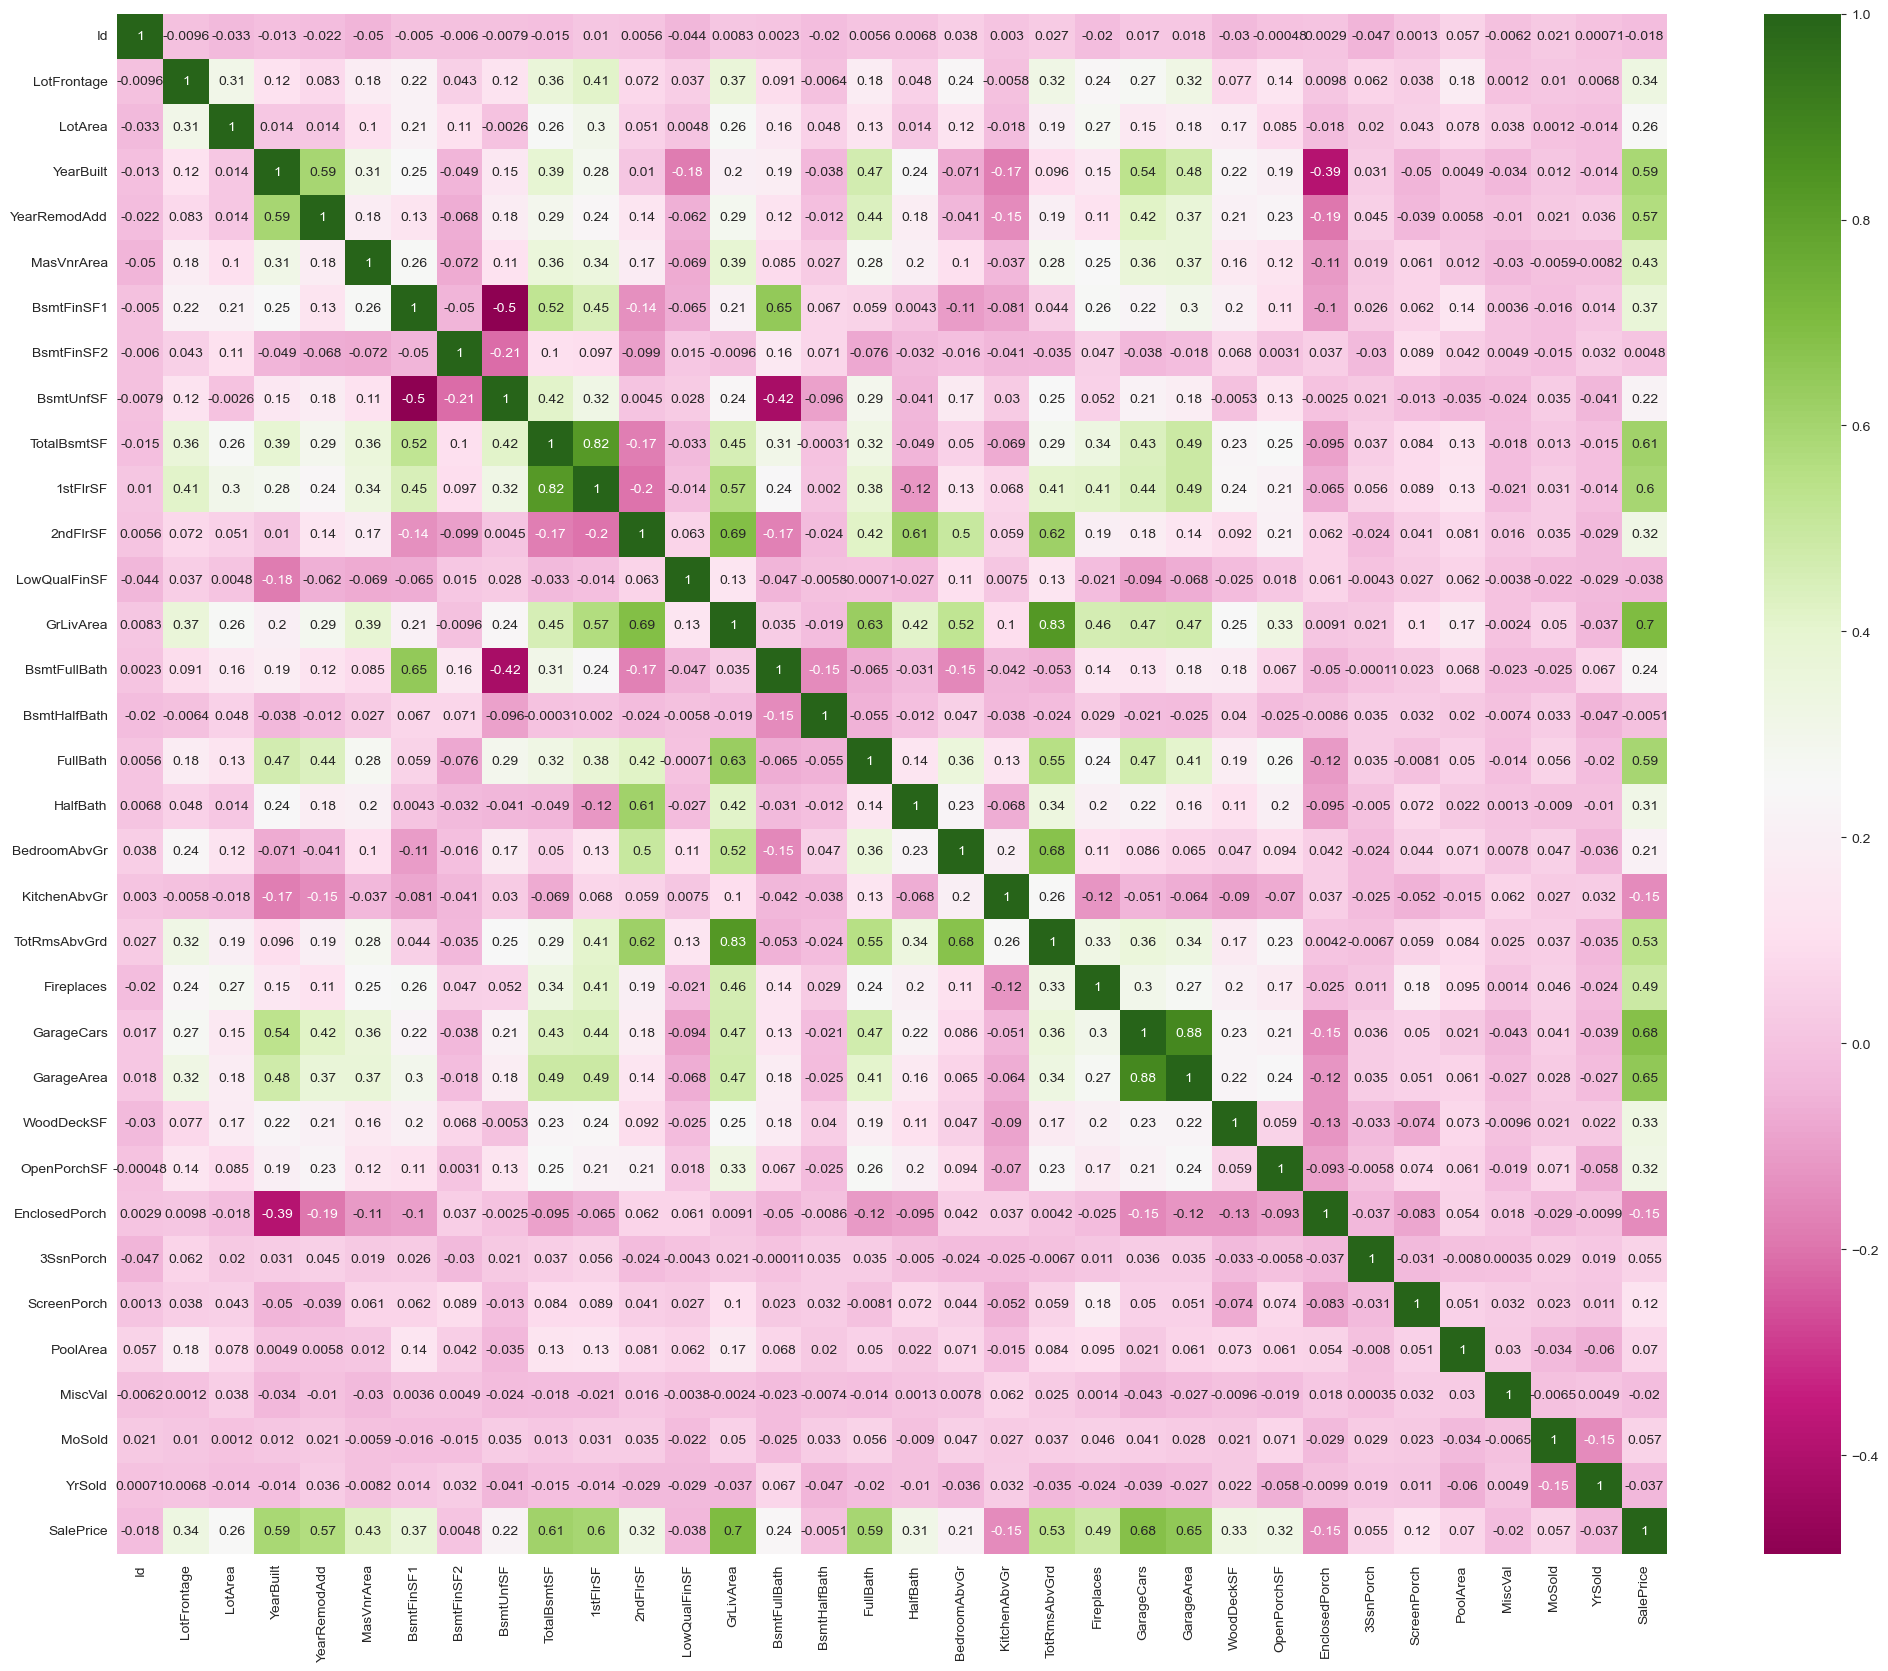

In [39]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(25,20))
sns.heatmap(df_num.corr(), annot=True, cmap='PiYG');

##### Observations:
1. Many colums have high corelation with each other
2. Target variable -Sales Price has strong corelation with GrLivArea(0.7), GarageCars(0.68) and GarageArea(0.65)
3. Multicolinearity is visible, so we could use Ridge regression

In [40]:
## Fix few columns before building model
## Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']

## Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

In [41]:
## View the dataframe again
df.head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave  None      Reg   
1   2         20       RL         80.0     9600   Pave  None      Reg   
2   3         60       RL         68.0    11250   Pave  None      IR1   
3   4         70       RL         60.0     9550   Pave  None      IR1   
4   5         60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearRemodAdd  \
0       Norm     1Fam     2Story           7           5          2003   
1       Norm     1Fam     1Story           6           8          1976   
2       Norm     1Fam     2Story           7           5          2002   
3       Norm     1Fam     2Story           7           5          1970   
4       Norm     1Fam     2Story           8           5          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           1          Gd   
4             1          Gd             9  

#### Dummy Variable Creation

In [45]:
## Updating the variable post modification
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include='object')

In [46]:
## Let's encode the categorical columns
df_cat_encoded = pd.get_dummies(df_cat, drop_first=True)
df_cat_encoded.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   Alley_None  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0           1           0             0             0             1   
1           1           0             0             0             1   
2           1           0             0             0             0   
3           1           0             0             0             0   
4           1           0             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   
3                0                0                1                 0   
4                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   N

In [48]:
## check the dimension of new data
df_cat_encoded.shape

(1460, 353)

#### Checking the outliers

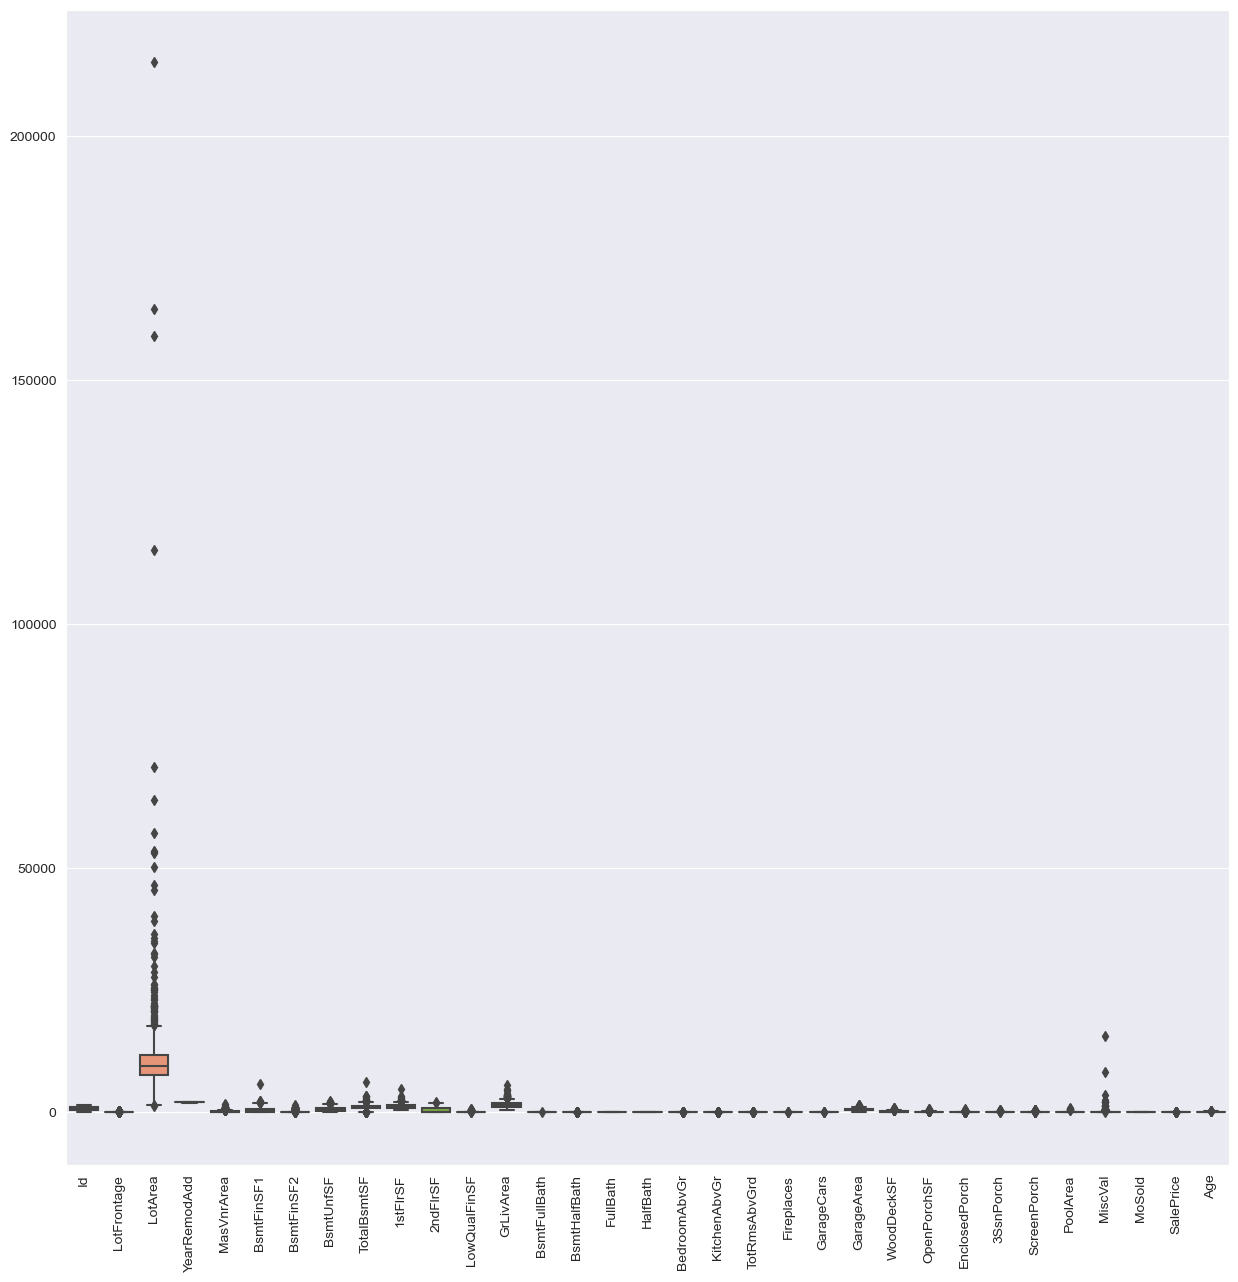

In [49]:
## Check the boxplots to view outliers in numerical columns
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [50]:
for col in df_num.columns:
    df_num[col][df_num[col] <= df_num[col].quantile(0.05)] = df_num[col].quantile(0.05)
    df_num[col][df_num[col] >= df_num[col].quantile(0.95)] = df_num[col].quantile(0.95)

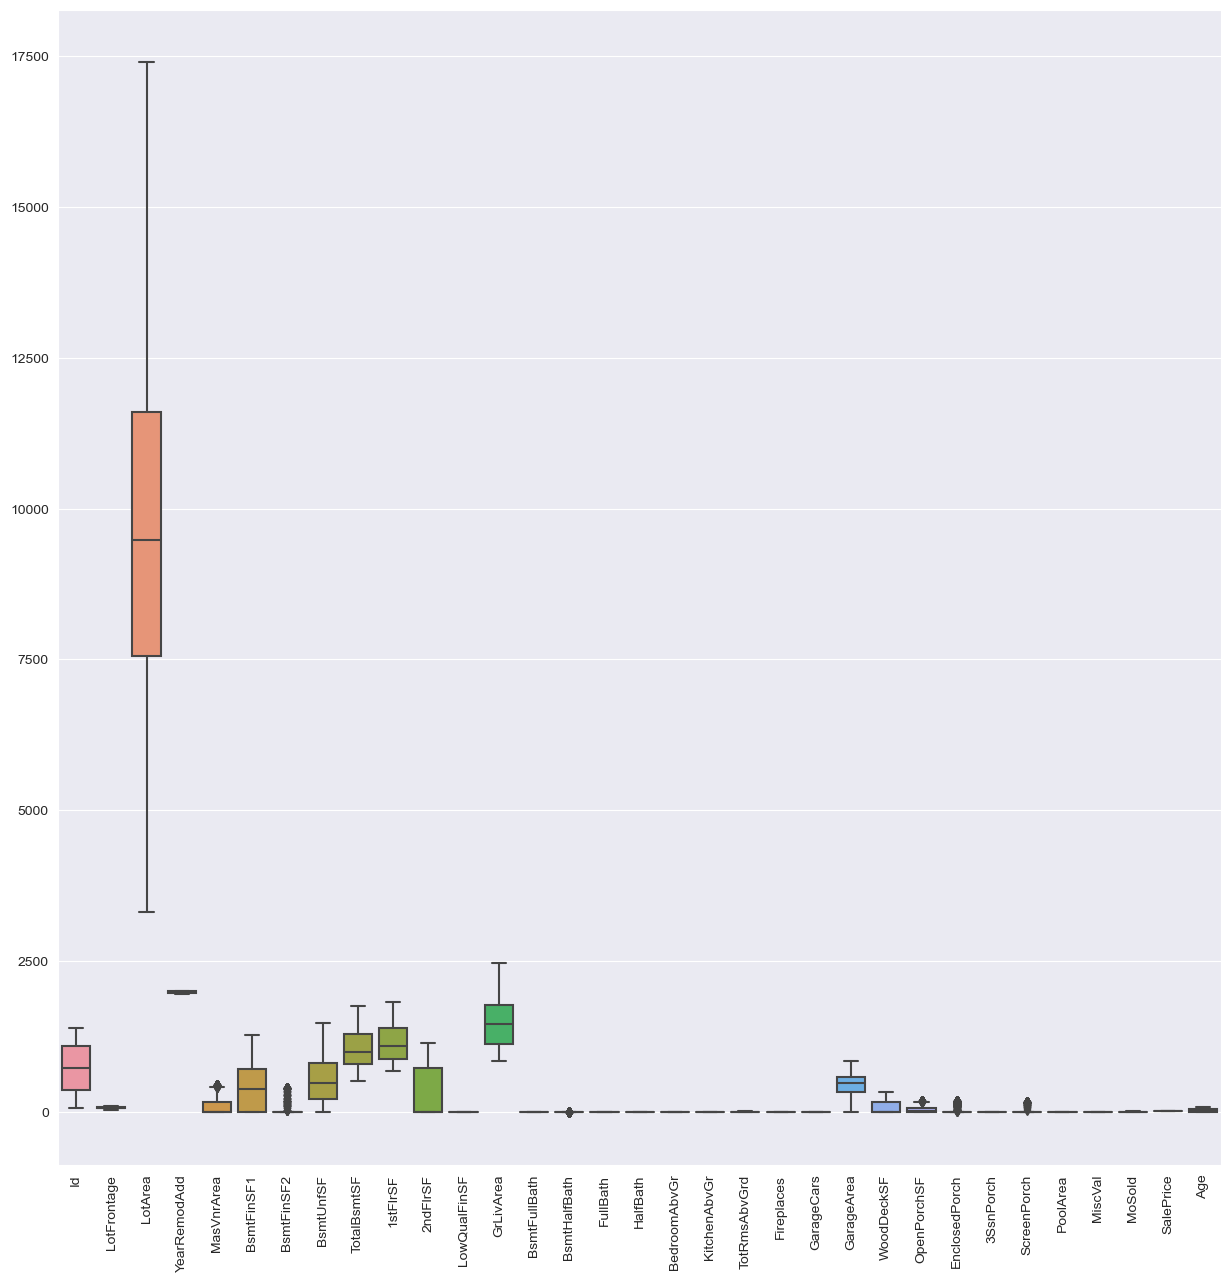

In [53]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_num);

In [57]:
## Concatenate the outlier treated numerical columns with one hot encoded categorical columns
df = pd.concat([df_num, df_cat_encoded], axis=1)


## View the first few rows of our dataframe
df.head()

Id  LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0  73.95         65.0   8450.0          2003       196.0         706   
1  73.95         80.0   9600.0          1976         0.0         978   
2  73.95         68.0  11250.0          2002       162.0         486   
3  73.95         60.0   9550.0          1970         0.0         216   
4  73.95         84.0  14260.0          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0        150        856.0     856.0     854.0             0   
1         0.0        284       1262.0    1262.0       0.0             0   
2         0.0        434        920.0     920.0     866.0             0   
3         0.0        540        756.0     961.0     756.0             0   
4         0.0        490       1145.0    1145.0    1053.0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0             1             8           0           2       548.0           0   
1             1             6           1           2       460.0         298   
2             1             6           1           2       608.0           0   
3             1             7           1           3       642.0           0   
4             1             9           1           3       836.0         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0         61.0           0.00          0            0         0        0   
1          0.0           0.00          0            0         0        0   
2         42.0           0.00          0            0         0        0   
3         35.0         180.15          0            0         0        0   
4         84.0           0.00          0            0         0        0   

   MoSold  SalePrice  Age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0       2  12.247694    5              0              0              0   
1       5  12.109011   31              0              0              0   
2       9  12.317167    7              0              0              0   
3       2  11.849398   91              0              0              0   
4      11  12.429216    8              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSSubClass_120  MSSubClass_160  \
0              0              0               0               0   
1              0              0               0               0   
2              0              0               0               0   
3              0              0               0               0   
4              0              0               0               0   

   MSSubClass_180  MSSubClass_190  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0               0               0            0            0            1   
1               0               0            0            0            1   
2               0               0            0            0            1   
3               0               0            0            0            1   


In [58]:
## Splitting the data for train and test
 ## Dropping of 'Id' (not useful) and 'SalePrice' (target variable). X has independent variables which can be used for prediction
X = df.drop(["Id", "SalePrice"], axis=1).copy()
X.head()   

LotFrontage  LotArea  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0          2003       196.0         706         0.0   
1         80.0   9600.0          1976         0.0         978         0.0   
2         68.0  11250.0          2002       162.0         486         0.0   
3         60.0   9550.0          1970         0.0         216         0.0   
4         84.0  14260.0          2000       350.0         655         0.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150        856.0     856.0     854.0             0     1710.0   
1        284       1262.0    1262.0       0.0             0     1262.0   
2        434        920.0     920.0     866.0             0     1786.0   
3        540        756.0     961.0     756.0             0     1717.0   
4        490       1145.0    1145.0    1053.0             0     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2       548.0           0         61.0   
1             6           1           2       460.0         298          0.0   
2             6           1           2       608.0           0         42.0   
3             7           1           3       642.0           0         35.0   
4             9           1           3       836.0         192         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  Age  \
0           0.00          0            0         0        0       2    5   
1           0.00          0            0         0        0       5   31   
2           0.00          0            0         0        0       9    7   
3         180.15          0            0         0        0       2   91   
4           0.00          0            0         0        0      11    8   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            

In [59]:
# Separating the target variable as y to predict
y = df["SalePrice"].copy()
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [60]:
# spilitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,test_size=0.2, random_state=42, shuffle=True)
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1168, 384)
(1168,)


In [61]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(292, 384)
(292,)


#### Scaling the variables

In [85]:
## Create a scaling instance
scaler = StandardScaler()

## Create a list of numerical columns to be scaled
num_col = list(X_train.select_dtypes(include=['int64', 'float64']).columns)


## Scale the numerical columns 
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

num_col  
 

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [68]:
## List of alphas
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

1. Ridge regression Model

In [69]:
## Calling the Ridge
ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [70]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.22841411, 0.08444948, 0.09674845, 0.0997035 , 0.11639462,
        0.09894953, 0.09966097, 0.13107934, 0.11634822, 0.1423758 ,
        0.13025699, 0.08363147, 0.14389434, 0.12107925, 0.08844223,
        0.16323981, 0.11414785, 0.16540341, 0.10216188, 0.13078241,
        0.1241704 , 0.1377738 , 0.18489022, 0.15942106, 0.18861208,
        0.23671417, 0.21734028, 0.18532896]),
 'std_fit_time': array([0.09766859, 0.02275419, 0.02605423, 0.03657421, 0.03721238,
        0.01967729, 0.02083004, 0.02523184, 0.02168046, 0.02894814,
        0.05006433, 0.00991426, 0.0514193 , 0.0384134 , 0.0079888 ,
        0.06603429, 0.03282559, 0.08094491, 0.03550734, 0.04334988,
        0.03592809, 0.0500389 , 0.10405222, 0.08843688, 0.06954572,
        0.04568297, 0.06548155, 0.14451889]),
 'mean_score_time': array([0.07203856, 0.02757654, 0.04035368, 0.0366385 , 0.02517328,
        0.03507819, 0.03233085, 0.03727913, 0.05634909, 0.04393601,
        0.03351736, 0.0308732 , 0.037575

In [72]:
## View the optimal value of alpha
ridgeCV.best_params_

{'alpha': 10.0}

In [73]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [74]:
## Make predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [75]:
## Check the Stats of Ridge
Ridge_R2Squared_Train = '%.2f' % r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Ridge_R2Squared_Train)
Ridge_R2Squared_Test = '%.2f' % r2_score(y_test, y_pred)
print("R-Squared (Test) =", Ridge_R2Squared_Test)
Ridge_RSS_Train = '%.2f' % (np.sum(np.square(y_train - y_train_pred)))
print("RSS (Train) =", Ridge_RSS_Train)
Ridge_RSS_Test = '%.2f' % (np.sum(np.square(y_test - y_pred)))
print("RSS (Test) =", Ridge_RSS_Test)
Ridge_MSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))
print("MSE (Train) =", Ridge_MSE_Train)
Ridge_MSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))
print("MSE (Test) =", Ridge_MSE_Test)
Ridge_RMSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))**0.5
print("RMSE (Train) =", Ridge_RMSE_Train)
Ridge_RMSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))**0.5
print("RMSE (Test) =", Ridge_RMSE_Test) 

R-Squared (Train) = 0.94
R-Squared (Test) = 0.93
RSS (Train) = 8.53
RSS (Test) = 2.87
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.09
RMSE (Test) = 0.10


In [80]:
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV.cv_results_

{'mean_fit_time': array([0.22841411, 0.08444948, 0.09674845, 0.0997035 , 0.11639462,
        0.09894953, 0.09966097, 0.13107934, 0.11634822, 0.1423758 ,
        0.13025699, 0.08363147, 0.14389434, 0.12107925, 0.08844223,
        0.16323981, 0.11414785, 0.16540341, 0.10216188, 0.13078241,
        0.1241704 , 0.1377738 , 0.18489022, 0.15942106, 0.18861208,
        0.23671417, 0.21734028, 0.18532896]),
 'std_fit_time': array([0.09766859, 0.02275419, 0.02605423, 0.03657421, 0.03721238,
        0.01967729, 0.02083004, 0.02523184, 0.02168046, 0.02894814,
        0.05006433, 0.00991426, 0.0514193 , 0.0384134 , 0.0079888 ,
        0.06603429, 0.03282559, 0.08094491, 0.03550734, 0.04334988,
        0.03592809, 0.0500389 , 0.10405222, 0.08843688, 0.06954572,
        0.04568297, 0.06548155, 0.14451889]),
 'mean_score_time': array([0.07203856, 0.02757654, 0.04035368, 0.0366385 , 0.02517328,
        0.03507819, 0.03233085, 0.03727913, 0.05634909, 0.04393601,
        0.03351736, 0.0308732 , 0.037575

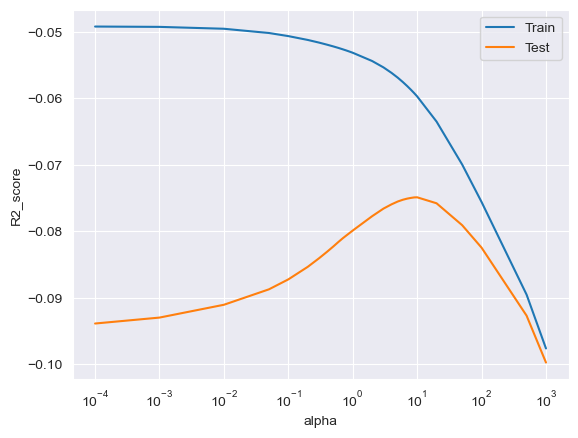

In [79]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [81]:
## Coef of Ridge model
ridge.coef_

array([ 6.56023354e-03,  2.07307896e-02,  2.49825538e-02, -2.40354563e-03,
        1.00177182e-02, -3.15225697e-04, -1.49039561e-02,  5.20474484e-02,
        7.45664130e-03,  2.88435254e-02,  0.00000000e+00,  8.85807944e-02,
        8.24181724e-03, -4.24723298e-04,  1.17438229e-02,  1.25064397e-02,
        4.98554634e-03,  0.00000000e+00, -3.41180286e-04,  1.92127953e-02,
        1.68790936e-02,  1.67328322e-02,  1.23269319e-02,  7.87306236e-03,
        2.53822117e-03,  0.00000000e+00,  1.07139979e-02,  0.00000000e+00,
        0.00000000e+00, -7.78499263e-04, -5.04655943e-02, -4.07061234e-02,
        5.51648124e-03,  6.20801048e-04, -4.85860044e-03, -5.71150836e-03,
        3.91666483e-02,  3.10825761e-02,  7.08003745e-04,  4.75844066e-03,
       -3.48924107e-02,  5.93672173e-03, -5.14776147e-02, -1.19237188e-02,
       -1.79847431e-02,  3.50102825e-02,  1.44037721e-02,  1.11946464e-02,
       -2.40515945e-02, -5.34877888e-03, -5.46542710e-03,  1.64560909e-02,
        1.08365421e-02, -

<p> Observation : From the graph it is clear that the optimal value of alpha is 10 </p>

2. Lasso Model

In [86]:
## Using Lasso Function
lasso = Lasso()

## cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [97]:
## View the results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.46137528, 0.08539004, 0.03796797, 0.03656354, 0.05543542,
        0.04200435, 0.03315654, 0.03343358, 0.03618727, 0.03952656,
        0.03852344, 0.05001931, 0.03422151, 0.05074058, 0.03507371,
        0.03217921, 0.03908648, 0.03741775, 0.0463088 , 0.05040655,
        0.05035019, 0.03929315, 0.04387593, 0.05842571, 0.05242729,
        0.03155637, 0.03861341, 0.03009796]),
 'std_fit_time': array([0.16131223, 0.02520022, 0.00102487, 0.0015316 , 0.02263921,
        0.01427288, 0.00268446, 0.00194169, 0.01273492, 0.01550519,
        0.01031975, 0.02354868, 0.00356732, 0.01895192, 0.00809589,
        0.0012958 , 0.01100534, 0.0136392 , 0.0303573 , 0.01001476,
        0.02008186, 0.00629908, 0.02121925, 0.02497643, 0.02056381,
        0.00204306, 0.00563406, 0.00122615]),
 'mean_score_time': array([0.01438999, 0.01378951, 0.01309791, 0.01282258, 0.01660862,
        0.02481627, 0.01345477, 0.01384354, 0.01782956, 0.04797387,
        0.01763258, 0.01334691, 0.013947

In [88]:
## Let's check the optima value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [89]:
# Create a Lasso regreesion instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [90]:
## Make predictions using lasso model
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [91]:
## Getting the stats for Lasso
Lasso_R2Squared_Train = '%.2f' % r2_score(y_train, y_train_pred)
print("R-Squared (Train) =",Lasso_R2Squared_Train)
Lasso_R2Squared_Test = '%.2f' % r2_score(y_test, y_pred)
print("R-Squared (Test) =", Lasso_R2Squared_Test)
Lasso_RSS_Train = '%.2f' % (np.sum(np.square(y_train - y_train_pred)))
print("RSS (Train) =", Lasso_RSS_Train)
Lasso_RSS_Test = '%.2f' % (np.sum(np.square(y_test - y_pred)))
print("RSS (Test) =", Lasso_RSS_Test)
Lasso_MSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))
print("MSE (Train) =", Lasso_MSE_Train)
Lasso_MSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))
print("MSE (Test) =", Lasso_MSE_Test)
Lasso_RMSE_Train = '%.2f' % (mean_squared_error(y_train, y_train_pred))**0.5
print("RMSE (Train) =", Lasso_RMSE_Train)
Lasso_RMSE_Test = '%.2f' % (mean_squared_error(y_test, y_pred))**0.5
print("RMSE (Test) =", Lasso_RMSE_Test) 

R-Squared (Train) = 0.92
R-Squared (Test) = 0.93
RSS (Train) = 11.29
RSS (Test) = 2.92
MSE (Train) = 0.01
MSE (Test) = 0.01
RMSE (Train) = 0.10
RMSE (Test) = 0.10


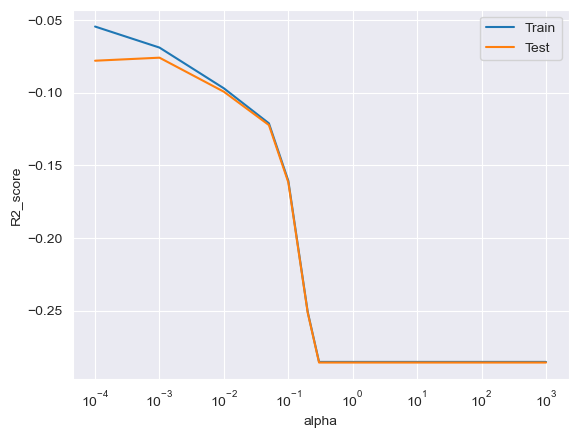

In [93]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

<p> Observations: After a certain error value(~0.05) the error remains constant </p>

In [98]:
## Check the coefficients of lasso fitted model
lasso.coef_

array([ 3.32682408e-03,  2.16451599e-02,  2.86137657e-02, -0.00000000e+00,
        2.58744193e-02,  1.54710949e-03, -0.00000000e+00,  4.26216769e-02,
       -0.00000000e+00,  1.06155389e-02,  0.00000000e+00,  1.06041784e-01,
        9.12081960e-03,  0.00000000e+00,  6.21173109e-03,  9.99869860e-03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.25705165e-02,
        1.92103380e-02,  1.94273494e-02,  1.12714413e-02,  7.92455346e-03,
        1.78530093e-03,  0.00000000e+00,  1.05985103e-02,  0.00000000e+00,
        0.00000000e+00, -7.58249012e-05, -5.22898052e-02, -3.01060185e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.05179688e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.64536115e-02,  0.00000000e+00, -4.41801750e-02, -0.00000000e+00,
       -0.00000000e+00,  3.77888104e-03,  0.00000000e+00,  0.00000000e+00,
       -3.73748455e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

### Comparision between the two models

In [101]:
# Creating a table which contain all the metrics

print("Score Type       | Lasso | Ridge")
print("R2 Score (Train)","|",Lasso_R2Squared_Train," |", Ridge_R2Squared_Train)
print("R2 Score (Test)"," |",Lasso_R2Squared_Test," |", Ridge_R2Squared_Test)
print("RSS (Train)","     |",Lasso_RSS_Train,"|", Ridge_RSS_Train)
print("RSS (Test)","      |",Lasso_RSS_Test," |", Lasso_RSS_Test)
print("MSE (Train)","     |",Lasso_MSE_Train," |", Ridge_MSE_Train)
print("MSE (Test)","      |",Lasso_MSE_Test," |", Ridge_MSE_Test)
print("RMSE (Train)","    |",Lasso_RMSE_Train," |", Ridge_RMSE_Train)
print("RMSE (Test)","     |",Lasso_RMSE_Test," |", Ridge_RMSE_Test)

Score Type       | Lasso | Ridge
R2 Score (Train) | 0.92  | 0.94
R2 Score (Test)  | 0.93  | 0.93
RSS (Train)      | 11.29 | 8.53
RSS (Test)       | 2.92  | 2.92
MSE (Train)      | 0.01  | 0.01
MSE (Test)       | 0.01  | 0.01
RMSE (Train)     | 0.10  | 0.09
RMSE (Test)      | 0.10  | 0.10


In [103]:

## First create empty datafame with all the independent variables as indices
df_beta = pd.DataFrame(index=X.columns)
df_beta.rows = X.columns

## Filling the Coefficient data
df_beta['Ridge'] = ridge.coef_
df_beta['Lasso'] = lasso.coef_

## View the coefficients
df_beta

Ridge     Lasso
LotFrontage            0.006560  0.003327
LotArea                0.020731  0.021645
YearRemodAdd           0.024983  0.028614
MasVnrArea            -0.002404 -0.000000
BsmtFinSF1             0.010018  0.025874
BsmtFinSF2            -0.000315  0.001547
BsmtUnfSF             -0.014904 -0.000000
TotalBsmtSF            0.052047  0.042622
1stFlrSF               0.007457 -0.000000
2ndFlrSF               0.028844  0.010616
LowQualFinSF           0.000000  0.000000
GrLivArea              0.088581  0.106042
BsmtFullBath           0.008242  0.009121
BsmtHalfBath          -0.000425  0.000000
FullBath               0.011744  0.006212
HalfBath               0.012506  0.009999
BedroomAbvGr           0.004986  0.000000
KitchenAbvGr           0.000000  0.000000
TotRmsAbvGrd          -0.000341 -0.000000
Fireplaces             0.019213  0.022571
GarageCars             0.016879  0.019210
GarageArea             0.016733  0.019427
WoodDeckSF             0.012327  0.011271
OpenPorchSF            0.007873  0.007925
EnclosedPorch          0.002538  0.001785
3SsnPorch              0.000000  0.000000
ScreenPorch            0.010714  0.010599
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
MoSold                -0.000778 -0.000076
Age                   -0.050466 -0.052290
MSSubClass_30         -0.040706 -0.003011
MSSubClass_40          0.005516  0.000000
MSSubClass_45          0.000621  0.000000
MSSubClass_50         -0.004859  0.000000
MSSubClass_60         -0.005712 -0.000000
MSSubClass_70          0.039167  0.030518
MSSubClass_75          0.031083  0.000000
MSSubClass_80          0.000708  0.000000
MSSubClass_85          0.004758  0.000000
MSSubClass_90         -0.034892 -0.016454
MSSubClass_120         0.005937  0.000000
MSSubClass_160        -0.051478 -0.044180
MSSubClass_180        -0.011924 -0.000000
MSSubClass_190        -0.017985 -0.000000
MSZoning_FV            0.035010  0.003779
MSZoning_RH            0.014404  0.000000
MSZoning_RL            0.011195  0.000000
MSZoning_RM           -0.024052 -0.037375
Street_Pave           -0.005349 -0.000000
Alley_None            -0.005465 -0.000000
Alley_Pave             0.016456  0.000000
LotShape_IR2           0.010837  0.000000
LotShape_IR3          -0.021062 -0.000000
LotShape_Reg           0.000003 -0.002287
LandContour_HLS        0.034116  0.000000
LandContour_Low        0.012972  0.000000
LandContour_Lvl        0.015297 -0.000000
Utilities_NoSeWa      -0.012578 -0.000000
LotConfig_CulDSac      0.026211  0.017651
LotConfig_FR2         -0.019448 -0.000000
LotConfig_FR3         -0.004259 -0.000000
LotConfig_Inside      -0.000691  0.000000
LandSlope_Mod         -0.004157  0.000000
LandSlope_Sev          0.032657  0.000000
Neighborhood_Blueste  -0.004372 -0.000000
Neighborhood_BrDale   -0.001332 -0.000000
Neighborhood_BrkSide   0.034017  0.026193
Neighborhood_ClearCr   0.028567  0.002704
Neighborhood_CollgCr  -0.016279 -0.000000
Neighborhood_Crawfor   0.075973  0.085739
Neighborhood_Edwards  -0.050458 -0.030219
Neighborhood_Gilbert  -0.010220 -0.000000
Neighborhood_IDOTRR    0.004729  0.000000
Neighborhood_MeadowV  -0.067944 -0.026237
Neighborhood_Mitchel  -0.033356 -0.000000
Neighborhood_NAmes    -0.029349 -0.000000
Neighborhood_NPkVill   0.010853  0.000000
Neighborhood_NWAmes   -0.023332 -0.000000
Neighborhood_NoRidge   0.007871  0.000000
Neighborhood_NridgHt   0.039806  0.024797
Neighborhood_OldTown  -0.023910 -0.000769
Neighborhood_SWISU     0.005447  0.000000
Neighborhood_Sawyer   -0.017847 -0.000000
Neighborhood_SawyerW  -0.019241 -0.000000
Neighborhood_Somerst   0.030577  0.043359
Neighborhood_StoneBr   0.046899  0.006373
Neighborhood_Timber    0.013137  0.000000
Neighborhood_Veenker   0.019902  0.000000
Condition1_Feedr      -0.002416 -0.000000
Condition1_Norm        0.036938  0.038347
Condition1_PosA        0.007052  0.000000
Condition1_PosN        0.019235  0.000000
Condition1_RRAe       -0.031345 -0.000000
Condition1_RRAn        0.011345  0.0

In [104]:
## View the number of features removed by lasso
## The resultant feature has been removed by lasso.
df_beta[df_beta['Lasso']==0].shape

(306, 2)

In [105]:
## View feature selected by Lasso
df_beta.loc[df_beta['Lasso']!=0, 'Lasso']

LotFrontage              0.003327
LotArea                  0.021645
YearRemodAdd             0.028614
BsmtFinSF1               0.025874
BsmtFinSF2               0.001547
TotalBsmtSF              0.042622
2ndFlrSF                 0.010616
GrLivArea                0.106042
BsmtFullBath             0.009121
FullBath                 0.006212
HalfBath                 0.009999
Fireplaces               0.022571
GarageCars               0.019210
GarageArea               0.019427
WoodDeckSF               0.011271
OpenPorchSF              0.007925
EnclosedPorch            0.001785
ScreenPorch              0.010599
MoSold                  -0.000076
Age                     -0.052290
MSSubClass_30           -0.003011
MSSubClass_70            0.030518
MSSubClass_90           -0.016454
MSSubClass_160          -0.044180
MSZoning_FV              0.003779
MSZoning_RM             -0.037375
LotShape_Reg            -0.002287
LotConfig_CulDSac        0.017651
Neighborhood_BrkSide     0.026193
Neighborhood_C

<p> Features significant in predicting the value of house according to both the models </p>

In [106]:
## View the top 10 coefficients of Ridge regression in descending order
df_beta['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.088581
OverallQual_9           0.080611
OverallQual_8           0.076786
Neighborhood_Crawfor    0.075973
OverallCond_9           0.074326
Functional_Typ          0.067938
Exterior1st_BrkFace     0.067441
SaleCondition_Alloca    0.064693
CentralAir_Y            0.054119
TotalBsmtSF             0.052047
Name: Ridge, dtype: float64

In [107]:
## View the top 10 coefficients of Lasso in descending order
df_beta['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.123148
GrLivArea               0.106042
OverallQual_8           0.102004
Neighborhood_Crawfor    0.085739
Exterior1st_BrkFace     0.075454
Functional_Typ          0.075430
CentralAir_Y            0.045692
Neighborhood_Somerst    0.043359
TotalBsmtSF             0.042622
Condition1_Norm         0.038347
Name: Lasso, dtype: float64

In [109]:
## To determine the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power)
ridge_coeffs = np.exp(df_beta['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.092623
OverallQual_9           1.083949
OverallQual_8           1.079811
Neighborhood_Crawfor    1.078933
OverallCond_9           1.077158
Functional_Typ          1.070299
Exterior1st_BrkFace     1.069768
SaleCondition_Alloca    1.066832
CentralAir_Y            1.055610
TotalBsmtSF             1.053426
Name: Ridge, dtype: float64

In [110]:
## To determine the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power)
lasso_coeffs = np.exp(df_beta['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.131052
GrLivArea               1.111868
OverallQual_8           1.107388
Neighborhood_Crawfor    1.089522
Exterior1st_BrkFace     1.078374
Functional_Typ          1.078347
CentralAir_Y            1.046752
Neighborhood_Somerst    1.044312
TotalBsmtSF             1.043543
Condition1_Norm         1.039092
Name: Lasso, dtype: float64

## Observations
1. R2 score for test results is close to 90% for both the models.
2. The optimal value for Lambda in *`Ridge Regression`* is *`10`* and for *`Lasso`* is *`0.001`*
3. The variables significant in predicting the price of house are:<br />
    * **GrLivArea** - Above grade (ground) living area square feet.<br />
             Higher the house from ground, higher the price<br />
    * **OverallQual** - overall material and finish of the house is 8(Very good) & 9 (Excellent)<br />
            The price range increased from 1.07 to 1.13 for Qaulity of 8 and 9 material.<br />
    * **Neighborhood** - Crawford neighborhood attracts more pricing. Somerset neighborhood also contributes to high pricing to certain extent.<br />
            The price increases around 1.07 to 1.09 times if it is around Crawford<br />
    * **Exterior1st** - Ifthe Exterior covering of the house is Brick Face(BrkFace) the pricing will be more compared to other types of exterior.<br />
    * **Functional** - A typical home funcionality is more pricey as compared to other.<br />
            Price may increase by 1.07 for TYP functional type.<br />
    * **CentralAir** - Centrally air conditioned house attract more price.<br />
    * **TotalBsmtSF** - House with more basement area has more price.<br />